In [542]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
from statsmodels.stats.anova import anova_lm  # Import anova_lm directly
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [106]:
# Seeing if Dataset Was Imported Correctly
df = pd.read_csv('Social Media Dataset.csv')
df.head()

,UserID,Age,Gender,Location,Income,Debt,Owns Property,Profession,Demographics,Platform,...,Productivity Loss,Satisfaction,Watch Reason,Device Type,OS,Watch Time,Self Control,Addiction Level,Current Activity,Connection Type
0,1,56,M,Pakistan,82812,True,True,Engineer,Rural,Instagram,...,3,7,Procrastination,Smartphone,Android,9:00 PM,5,5,Commuting,Mobile Data
1,2,46,F,Mexico,27999,False,True,Artist,Urban,Instagram,...,5,5,Habit,Computer,Android,5:00 PM,7,3,At school,Wi-Fi
2,3,32,F,United States,42436,False,True,Engineer,Rural,Facebook,...,6,4,Entertainment,Tablet,Android,2:00 PM,8,2,At home,Mobile Data
3,4,60,M,Barzil,62963,True,False,Waiting staff,Rural,YouTube,...,3,7,Habit,Smartphone,Android,9:00 PM,5,5,Commuting,Mobile Data
4,5,25,M,Pakistan,22096,False,True,Manager,Urban,TikTok,...,8,2,Boredom,Smartphone,iOS,8:00 AM,10,0,At home,Mobile Data


In [108]:
# Identifying the columns and their format
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   UserID                    1000 non-null   int64 
 1   Age                       1000 non-null   int64 
 2   Gender                    1000 non-null   object
 3   Location                  1000 non-null   object
 4   Income                    1000 non-null   int64 
 5   Debt                      1000 non-null   bool  
 6   Owns Property             1000 non-null   bool  
 7   Profession                1000 non-null   object
 8   Demographics              1000 non-null   object
 9   Platform                  1000 non-null   object
 10  Total Time Spent          1000 non-null   int64 
 11  Number of Sessions        1000 non-null   int64 
 12  Video ID                  1000 non-null   int64 
 13  Video Category            1000 non-null   object
 14  Video Length             

In [110]:
df.columns

Index(['UserID', 'Age', 'Gender', 'Location', 'Income', 'Debt',
       'Owns Property', 'Profession', 'Demographics', 'Platform',
       'Total Time Spent', 'Number of Sessions', 'Video ID', 'Video Category',
       'Video Length', 'Engagement', 'Importance Score', 'Time Spent On Video',
       'Number of Videos Watched', 'Scroll Rate', 'Frequency',
       'Productivity Loss', 'Satisfaction', 'Watch Reason', 'Device Type',
       'OS', 'Watch Time', 'Self Control', 'Addiction Level',
       'Current Activity', 'Connection Type'],
      dtype='object')

In [112]:
# Descriptive Statistics
df.describe()

,UserID,Age,Income,Total Time Spent,Number of Sessions,Video ID,Video Length,Engagement,Importance Score,Time Spent On Video,Number of Videos Watched,Scroll Rate,Productivity Loss,Satisfaction,Self Control,Addiction Level
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,40.986000,59524.213000,151.406000,10.013000,4891.738000,15.214000,4997.159000,5.129000,14.973000,25.248000,49.774000,5.136000,4.864000,7.094000,2.906000
std,288.819436,13.497852,23736.212925,83.952637,5.380314,2853.144258,8.224953,2910.053701,2.582834,8.200092,14.029159,29.197798,2.122265,2.122265,2.058495,2.058495
min,1.000000,18.000000,20138.000000,10.000000,1.000000,11.000000,1.000000,15.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,0.000000
25%,250.750000,29.000000,38675.250000,78.000000,6.000000,2542.000000,8.000000,2415.750000,3.000000,8.000000,14.000000,23.000000,3.000000,4.000000,5.000000,2.000000
50%,500.500000,42.000000,58805.000000,152.000000,10.000000,4720.500000,15.000000,5016.000000,5.000000,15.000000,25.000000,50.000000,5.000000,5.000000,7.000000,3.000000
75%,750.250000,52.000000,79792.250000,223.000000,15.000000,7346.000000,22.000000,7540.250000,7.000000,22.000000,37.000000,74.000000,6.000000,7.000000,8.000000,5.000000
max,1000.000000,64.000000,99676.000000,298.000000,19.000000,9997.000000,29.000000,9982.000000,9.000000,29.000000,49.000000,99.000000,9.000000,9.000000,10.000000,7.000000


In [113]:
# CORRELATION ANALYSIS

                            UserID       Age    Income  Total Time Spent  \
UserID                    1.000000 -0.024857  0.056221          0.035689   
Age                      -0.024857  1.000000 -0.017923         -0.004166   
Income                    0.056221 -0.017923  1.000000          0.013326   
Total Time Spent          0.035689 -0.004166  0.013326          1.000000   
Number of Sessions        0.022750  0.006563 -0.009979         -0.013876   
Video ID                  0.002670  0.047762  0.003320         -0.018057   
Video Length             -0.037910  0.009557  0.017432          0.068607   
Engagement               -0.013374  0.010417 -0.017183         -0.033743   
Importance Score          0.009265 -0.014994 -0.000762         -0.043414   
Time Spent On Video      -0.055781  0.034535 -0.041666          0.053319   
Number of Videos Watched  0.002627 -0.033776 -0.036211         -0.020969   
Scroll Rate               0.025134 -0.018768  0.029066          0.004211   
Productivity

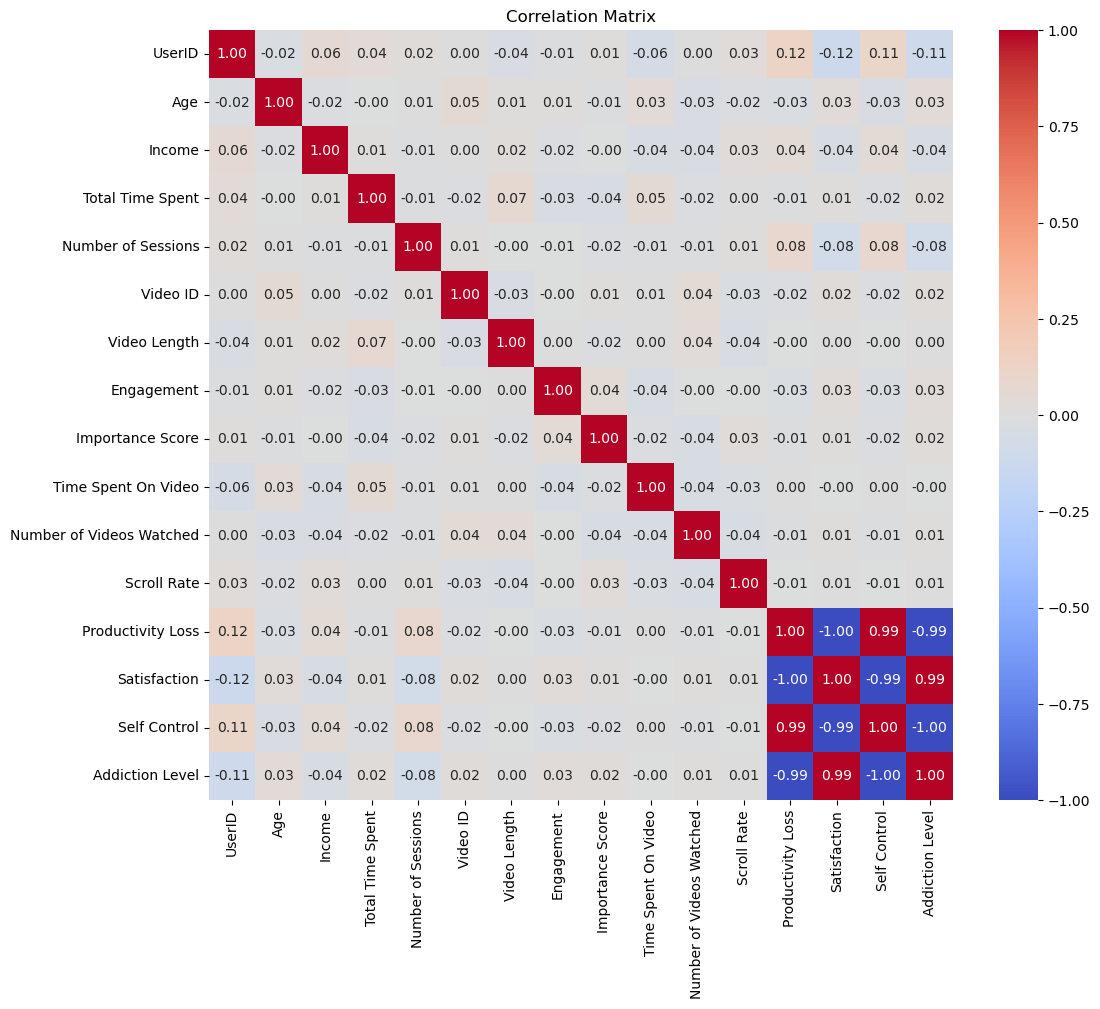

In [116]:
# Select only the numeric columns (int64 and float64)
numeric_df = df.select_dtypes(include=['int64', 'float64'])

# Calculate the correlation matrix
correlation_matrix = numeric_df.corr()
print(correlation_matrix)

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(12, 10))  # Adjust the figure size as needed
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

In [208]:
# ProductivityLoss - Satisfaction (-1.00 correlation) = Higher ProductivityLoss is strongly associated with lower Satisfaction.
# Satisfaction - ProductivityLoss (-1.00 correlation) = Higher Satisfaction is strongly associated with lower ProductivityLoss.
# ProductivityLoss - Self Control (0.99 correlation) = Higher ProductivityLoss is strongly associated with Higher Self Control.
# Self Control - ProductivityLoss (0.99 correlation) = Higher Self Control is strongly associated with Higher ProductivityLoss.
# ProductivityLoss - Addiction Level (-0.99 correlation) = Higher ProductivityLoss is strongly associated with Lower Addiction Level.
# Addiction Level - ProducitivtyLoss (-0.99 correlation) = Higher Addiction Level is strongly associated with Higher ProductivityLoss.
# Self Control - Satisfaction (-0.99 correlation) = Higher Self Control is strongly associated with Lower Satisfaction.
# Satisfaction - Self Control (-0.99 correlation) = Higher Satisfaction is strongly associated with Lower Self Control.
# Addiction Level - Self Control (-1.00 correlation) = Higher Addiction Level is strongly associated with lower Self Control.
# Self Control - Addiction Level (-1.00 correlation) = Higher Self Control is strongly associated with Addiction Level. 

In [ ]:
# ANOVA ANALYSIS

In [590]:
# No.1 Demographic Factors ANOVA Analysis

In [556]:
# Categorizing ages into groups
def categorize_age(age):
  if age < 25:
    return '18-24'
  elif age < 35:
    return '25-34'
  elif age < 45:
    return '35-44'
  elif age < 55:
    return '45-54'
  elif age < 65:
    return '55-64'

df['Age Group'] = df['Age'].apply(categorize_age)

In [550]:
# Define the model
model = smf.ols('Q("Total Time Spent") ~ Q("Age Group")', data=df).fit()

# Perform the ANOVA
anova_table = anova_lm(model, typ=2)
print(anova_table)

# Perform Tukey's HSD (if ANOVA is significant)
tukey_results = pairwise_tukeyhsd(df['Total Time Spent'], df['Age Group'])
print(tukey_results)

                      sum_sq     df         F    PR(>F)
Q("Age Group")  1.698813e+04    4.0  0.601622  0.661544
Residual        7.024009e+06  995.0       NaN       NaN
 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower    upper  reject
-----------------------------------------------------
 18-24  25-34 -12.8725   0.61 -37.5151 11.7701  False
 18-24  35-44  -9.0308 0.8461 -33.2234 15.1618  False
 18-24  45-54  -4.8264 0.9813 -28.5915 18.9388  False
 18-24  55-64  -5.1154 0.9802 -29.9246 19.6937  False
 25-34  35-44   3.8417 0.9903 -18.6943 26.3777  False
 25-34  45-54   8.0461 0.8572 -14.0303 30.1226  False
 25-34  55-64   7.7571 0.8916 -15.4395 30.9537  False
 35-44  45-54   4.2044  0.984 -17.3686 25.7774  False
 35-44  55-64   3.9154 0.9899 -18.8026 26.6333  False
 45-54  55-64  -0.2891    1.0 -22.5513 21.9731  False
-----------------------------------------------------


In [552]:
# Define the model
model = smf.ols('Q("Total Time Spent") ~ Q("Gender")', data=df).fit()

# Perform the ANOVA
anova_table = anova_lm(model, typ=2)
print(anova_table)

# Perform Tukey's HSD (if ANOVA is significant)
tukey_results = pairwise_tukeyhsd(df['Total Time Spent'], df['Gender'])
print(tukey_results)

                   sum_sq     df         F    PR(>F)
Q("Gender")  5.430966e+03    2.0  0.384807  0.680683
Residual     7.035566e+06  997.0       NaN       NaN
 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower    upper  reject
-----------------------------------------------------
     F      M   3.4969 0.8278 -10.5167 17.5104  False
     F      O   6.8356 0.6731 -12.0801 25.7513  False
     M      O   3.3387 0.8974 -14.3447 21.0221  False
-----------------------------------------------------


In [554]:
# Define the model
model = smf.ols('Q("Total Time Spent") ~ Q("Location")', data=df).fit()

# Perform the ANOVA
anova_table = anova_lm(model, typ=2)
print(anova_table)

# Perform Tukey's HSD (if ANOVA is significant)
tukey_results = pairwise_tukeyhsd(df['Total Time Spent'], df['Location'])
print(tukey_results)

                     sum_sq     df         F    PR(>F)
Q("Location")  7.301774e+04    9.0  1.152695  0.322388
Residual       6.967979e+06  990.0       NaN       NaN
        Multiple Comparison of Means - Tukey HSD, FWER=0.05        
    group1        group2    meandiff p-adj   lower    upper  reject
-------------------------------------------------------------------
       Barzil       Germany -15.2555 0.9887 -61.1555 30.6445  False
       Barzil         India   5.0084    1.0 -29.8872 39.9041  False
       Barzil     Indonesia    0.976    1.0 -41.7605 43.7125  False
       Barzil         Japan  17.5128 0.9557 -25.5095 60.5351  False
       Barzil        Mexico  14.3941 0.9887 -28.9276 57.7158  False
       Barzil      Pakistan  10.7014 0.9987 -32.1763 53.5792  False
       Barzil   Philippines  17.9231 0.9456 -24.6753 60.5215  False
       Barzil United States   5.4036    1.0  -30.846 41.6533  False
       Barzil       Vietnam  -7.0807 0.9999 -49.1564  34.995  False
      Germany      

In [ ]:
# interpretation
    # There was no statistical significance between Total Time Spent and Age Groups (p = 0.66 > 0.05), Gender (p = 0.68 > 0.05), and Location (p = 0.32 > 0.05).

In [614]:
# Define the model
model = smf.ols('Q("Number of Sessions") ~ Q("Age Group")', data=df).fit()

# Perform the ANOVA
anova_table = anova_lm(model, typ=2)
print(anova_table)

# Perform Tukey's HSD (if ANOVA is significant)
tukey_results = pairwise_tukeyhsd(df['Number of Sessions'], df['Age Group'])
print(tukey_results)

                     sum_sq     df         F   PR(>F)
Q("Age Group")    193.93419    4.0  1.679419  0.15251
Residual        28724.89681  995.0       NaN      NaN
Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
 18-24  25-34  -0.1267 0.9995 -1.7026 1.4492  False
 18-24  35-44   0.1912 0.9972 -1.3559 1.7383  False
 18-24  45-54  -0.7465 0.6647 -2.2663 0.7732  False
 18-24  55-64   0.5296 0.8922 -1.0569 2.1161  False
 25-34  35-44   0.3179 0.9746 -1.1232 1.7591  False
 25-34  45-54  -0.6198 0.7515 -2.0316 0.7919  False
 25-34  55-64   0.6563 0.7461 -0.8271 2.1397  False
 35-44  45-54  -0.9378 0.3412 -2.3174 0.4418  False
 35-44  55-64   0.3384 0.9691 -1.1144 1.7912  False
 45-54  55-64   1.2761 0.1033 -0.1475 2.6998  False
---------------------------------------------------


In [562]:
# Define the model
model = smf.ols('Q("Number of Sessions") ~ Q("Gender")', data=df).fit()

# Perform the ANOVA
anova_table = anova_lm(model, typ=2)
print(anova_table)

# Perform Tukey's HSD (if ANOVA is significant)
tukey_results = pairwise_tukeyhsd(df['Number of Sessions'], df['Gender'])
print(tukey_results)

                   sum_sq     df        F  PR(>F)
Q("Gender")    102.070305    2.0  1.76571  0.1716
Residual     28816.760695  997.0      NaN     NaN
Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper reject
--------------------------------------------------
     F      M  -0.6989 0.1606 -1.5957 0.198  False
     F      O  -0.6276 0.4434 -1.8382 0.583  False
     M      O   0.0713  0.988 -1.0604 1.203  False
--------------------------------------------------


In [560]:
# Define the model
model = smf.ols('Q("Number of Sessions") ~ Q("Location")', data=df).fit()

# Perform the ANOVA
anova_table = anova_lm(model, typ=2)
print(anova_table)

# Perform Tukey's HSD (if ANOVA is significant)
tukey_results = pairwise_tukeyhsd(df['Number of Sessions'], df['Location'])
print(tukey_results)

                     sum_sq     df         F    PR(>F)
Q("Location")    348.733655    9.0  1.342687  0.210315
Residual       28570.097345  990.0       NaN       NaN
       Multiple Comparison of Means - Tukey HSD, FWER=0.05       
    group1        group2    meandiff p-adj   lower  upper  reject
-----------------------------------------------------------------
       Barzil       Germany  -0.0337    1.0 -2.9728 2.9054  False
       Barzil         India   0.3063    1.0 -1.9281 2.5408  False
       Barzil     Indonesia   -0.799 0.9956 -3.5356 1.9375  False
       Barzil         Japan   -1.021  0.976 -3.7759 1.7338  False
       Barzil        Mexico    -1.31 0.8933  -4.084  1.464  False
       Barzil      Pakistan  -0.5928 0.9996 -3.3384 2.1528  False
       Barzil   Philippines      0.0    1.0 -2.7277 2.7277  False
       Barzil United States  -0.8077 0.9844 -3.1289 1.5135  False
       Barzil       Vietnam  -1.3402  0.859 -4.0344  1.354  False
      Germany         India     0.34    1.0

In [ ]:
# Interpretation
    # There was no statistical significance between the Number of Videos Watched and Age Groups (p = 0.79 > 0.05), Gender (p = 0.18 > 0.05), and Location (p = 0.07 > 0.05).

In [564]:
# Define the model
model = smf.ols('Q("Number of Videos Watched") ~ Q("Age Group")', data=df).fit()

# Perform the ANOVA
anova_table = anova_lm(model, typ=2)
print(anova_table)

# Perform Tukey's HSD (if ANOVA is significant)
tukey_results = pairwise_tukeyhsd(df['Number of Videos Watched'], df['Age Group'])
print(tukey_results)

                       sum_sq     df         F    PR(>F)
Q("Age Group")     331.732737    4.0  0.420393  0.794013
Residual        196288.763263  995.0       NaN       NaN
Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
 18-24  25-34  -0.8935 0.9762  -5.013  3.226  False
 18-24  35-44  -1.3739 0.8859 -5.4182 2.6704  False
 18-24  45-54  -0.7086 0.9885 -4.6814 3.2642  False
 18-24  55-64   -1.805 0.7575 -5.9523 2.3423  False
 25-34  35-44  -0.4804 0.9968 -4.2477 3.2869  False
 25-34  45-54   0.1849 0.9999 -3.5056 3.8754  False
 25-34  55-64  -0.9115  0.968 -4.7892 2.9662  False
 35-44  45-54   0.6653  0.987  -2.941 4.2716  False
 35-44  55-64  -0.4311  0.998 -4.2289 3.3666  False
 45-54  55-64  -1.0964 0.9291  -4.818 2.6251  False
---------------------------------------------------


In [566]:
# Define the model
model = smf.ols('Q("Number of Videos Watched") ~ Q("Gender")', data=df).fit()

# Perform the ANOVA
anova_table = anova_lm(model, typ=2)
print(anova_table)

# Perform Tukey's HSD (if ANOVA is significant)
tukey_results = pairwise_tukeyhsd(df['Number of Videos Watched'], df['Gender'])
print(tukey_results)

                    sum_sq     df        F    PR(>F)
Q("Gender")     666.624303    2.0  1.69587  0.183968
Residual     195953.871697  997.0      NaN       NaN
Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
     F      M   0.6005 0.8187 -1.7382 2.9392  False
     F      O  -1.7144 0.4098 -4.8712 1.4424  False
     M      O  -2.3149 0.1568 -5.2661 0.6362  False
---------------------------------------------------


In [568]:
# Define the model
model = smf.ols('Q("Number of Videos Watched") ~ Q("Location")', data=df).fit()

# Perform the ANOVA
anova_table = anova_lm(model, typ=2)
print(anova_table)

# Perform Tukey's HSD (if ANOVA is significant)
tukey_results = pairwise_tukeyhsd(df['Number of Videos Watched'], df['Location'])
print(tukey_results)

                     sum_sq     df         F    PR(>F)
Q("Location")    3099.79266    9.0  1.761968  0.071453
Residual       193520.70334  990.0       NaN       NaN
        Multiple Comparison of Means - Tukey HSD, FWER=0.05        
    group1        group2    meandiff p-adj   lower    upper  reject
-------------------------------------------------------------------
       Barzil       Germany  -2.8711 0.9738 -10.5205  4.7782  False
       Barzil         India  -2.4265 0.9483  -8.2419   3.389  False
       Barzil     Indonesia   0.5882    1.0  -6.5339  7.7104  False
       Barzil         Japan  -0.8015    1.0  -7.9713  6.3682  False
       Barzil        Mexico  -4.2538 0.6906 -11.4734  2.9659  False
       Barzil      Pakistan  -0.8607    1.0  -8.0063   6.285  False
       Barzil   Philippines  -3.0256 0.9412 -10.1247  4.0735  False
       Barzil United States  -1.1225 0.9999  -7.1635  4.9186  False
       Barzil       Vietnam  -6.1241 0.1484 -13.1361  0.8879  False
      Germany      

In [ ]:
# Interpretation
    # There was no statistical significance between the Number of Sessions and Age Groups (p = 0.15 > 0.05), Gender (p = 0.17 > 0.05), and Location (p = 0.21 > 0.05).

In [ ]:
# Behavioral Factors: ANOVA Analysis

In [570]:
# Define the model
model = smf.ols('Q("Engagement") ~ Q("Watch Reason")', data=df).fit()

# Perform the ANOVA
anova_table = anova_lm(model, typ=2)
print(anova_table)

# Perform Tukey's HSD (if ANOVA is significant)
tukey_results = pairwise_tukeyhsd(df['Engagement'], df['Watch Reason'])
print(tukey_results)

                         sum_sq     df         F    PR(>F)
Q("Watch Reason")  9.497354e+05    3.0  0.037275  0.990375
Residual           8.458994e+09  996.0       NaN       NaN
          Multiple Comparison of Means - Tukey HSD, FWER=0.05          
    group1         group2     meandiff p-adj    lower    upper   reject
-----------------------------------------------------------------------
      Boredom   Entertainment   -4.304    1.0  -649.348   640.74  False
      Boredom           Habit  53.8537 0.9958  -553.558 661.2654  False
      Boredom Procrastination  72.2854 0.9959 -747.3058 891.8766  False
Entertainment           Habit  58.1577 0.9949 -557.4292 673.7446  False
Entertainment Procrastination  76.5894 0.9952 -749.0788 902.2576  False
        Habit Procrastination  18.4317 0.9999 -778.1832 815.0466  False
-----------------------------------------------------------------------


In [572]:
# Define the model
model = smf.ols('Q("Total Time Spent") ~ Q("Watch Reason")', data=df).fit()

# Perform the ANOVA
anova_table = anova_lm(model, typ=2)
print(anova_table)

# Perform Tukey's HSD (if ANOVA is significant)
tukey_results = pairwise_tukeyhsd(df['Total Time Spent'], df['Watch Reason'])
print(tukey_results)

                         sum_sq     df         F    PR(>F)
Q("Watch Reason")  3.263589e+04    3.0  1.546027  0.201014
Residual           7.008361e+06  996.0       NaN       NaN
         Multiple Comparison of Means - Tukey HSD, FWER=0.05         
    group1         group2     meandiff p-adj   lower    upper  reject
---------------------------------------------------------------------
      Boredom   Entertainment   4.9647 0.9017 -13.6021 23.5316  False
      Boredom           Habit   14.048 0.1645  -3.4357 31.5316  False
      Boredom Procrastination   3.6177 0.9792 -19.9732 27.2087  False
Entertainment           Habit   9.0833 0.5509  -8.6357 26.8022  False
Entertainment Procrastination   -1.347 0.9989 -25.1129 22.4189  False
        Habit Procrastination -10.4302 0.6456 -33.3599 12.4994  False
---------------------------------------------------------------------


In [574]:
# Define the model
model = smf.ols('Q("Number of Sessions") ~ Q("Watch Reason")', data=df).fit()

# Perform the ANOVA
anova_table = anova_lm(model, typ=2)
print(anova_table)

# Perform Tukey's HSD (if ANOVA is significant)
tukey_results = pairwise_tukeyhsd(df['Number of Sessions'], df['Watch Reason'])
print(tukey_results)

                         sum_sq     df         F    PR(>F)
Q("Watch Reason")     89.913706    3.0  1.035466  0.375998
Residual           28828.917294  996.0       NaN       NaN
        Multiple Comparison of Means - Tukey HSD, FWER=0.05        
    group1         group2     meandiff p-adj   lower  upper  reject
-------------------------------------------------------------------
      Boredom   Entertainment  -0.7009  0.429 -1.8917 0.4899  False
      Boredom           Habit  -0.6591 0.4303 -1.7804 0.4623  False
      Boredom Procrastination  -0.3085 0.9531 -1.8215 1.2046  False
Entertainment           Habit   0.0418 0.9997 -1.0946 1.1783  False
Entertainment Procrastination   0.3924 0.9111 -1.1318 1.9167  False
        Habit Procrastination   0.3506 0.9278   -1.12 1.8212  False
-------------------------------------------------------------------


In [576]:
# Define the model
model = smf.ols('Q("Number of Videos Watched") ~ Q("Watch Reason")', data=df).fit()

# Perform the ANOVA
anova_table = anova_lm(model, typ=2)
print(anova_table)

# Perform Tukey's HSD (if ANOVA is significant)
tukey_results = pairwise_tukeyhsd(df['Number of Videos Watched'], df['Watch Reason'])
print(tukey_results)

                          sum_sq     df         F    PR(>F)
Q("Watch Reason")     434.485799    3.0  0.735268  0.531068
Residual           196186.010201  996.0       NaN       NaN
        Multiple Comparison of Means - Tukey HSD, FWER=0.05        
    group1         group2     meandiff p-adj   lower  upper  reject
-------------------------------------------------------------------
      Boredom   Entertainment   0.4322 0.9843 -2.6742 3.5386  False
      Boredom           Habit   1.2976 0.6638 -1.6276 4.2229  False
      Boredom Procrastination   1.8724 0.6138 -2.0747 5.8194  False
Entertainment           Habit   0.8654 0.8761 -2.0991   3.83  False
Entertainment Procrastination   1.4402 0.7876 -2.5362 5.4165  False
        Habit Procrastination   0.5747 0.9805 -3.2617 4.4111  False
-------------------------------------------------------------------


In [616]:
# Interpretation
    # There was no statistical significance between Engagement and Watch Reason (p = 0.99 > 0.05).
    # There was no statistical significance between Total Time Spent and Watch Reason (p = 0.20 > 0.05).
    # There was no statistical significance between the Number of Sessions and Watch Reason (p = 0.37 > 0.05).
    # There was no statistical significance between the Number of Videos Watched and Watch Reason (p = 0.53 > 0.05).

In [578]:
# Content Preferences ANOVA Analysis

In [586]:
# Define the model
model = smf.ols('Q("Number of Videos Watched") ~ Q("Video Category")', data=df).fit()

# Perform the ANOVA
anova_table = anova_lm(model, typ=2)
print(anova_table)

# Perform Tukey's HSD (if ANOVA is significant)
tukey_results = pairwise_tukeyhsd(df['Number of Videos Watched'], df['Video Category'])
print(tukey_results)

                            sum_sq     df         F    PR(>F)
Q("Video Category")     351.611016    8.0  0.221919  0.987051
Residual             196268.884984  991.0       NaN       NaN
       Multiple Comparison of Means - Tukey HSD, FWER=0.05        
    group1        group2    meandiff p-adj   lower   upper  reject
------------------------------------------------------------------
         ASMR        Comedy   0.4597    1.0  -8.4234 9.3428  False
         ASMR Entertainment  -1.3759 0.9993  -7.9326 5.1808  False
         ASMR        Gaming  -0.0076    1.0  -6.3565 6.3414  False
         ASMR   Jokes/Memes  -0.3673    1.0  -6.2765 5.5419  False
         ASMR    Life Hacks  -1.0752 0.9998  -7.0786 4.9281  False
         ASMR        Pranks  -1.4157  0.999  -7.8674 5.0361  False
         ASMR        Trends  -0.4375    1.0  -7.0227 6.1478  False
         ASMR         Vlogs   0.1324    1.0  -6.2719 6.5367  False
       Comedy Entertainment  -1.8356 0.9992 -10.4057 6.7345  False
       Com

In [584]:
# Define the model
model = smf.ols('Q("Total Time Spent") ~ Q("Video Category")', data=df).fit()

# Perform the ANOVA
anova_table = anova_lm(model, typ=2)
print(anova_table)

# Perform Tukey's HSD (if ANOVA is significant)
tukey_results = pairwise_tukeyhsd(df['Total Time Spent'], df['Video Category'])
print(tukey_results)

                           sum_sq     df         F   PR(>F)
Q("Video Category")  8.553120e+03    8.0  0.150661  0.99656
Residual             7.032444e+06  991.0       NaN      NaN
        Multiple Comparison of Means - Tukey HSD, FWER=0.05        
    group1        group2    meandiff p-adj   lower    upper  reject
-------------------------------------------------------------------
         ASMR        Comedy   4.1295    1.0 -49.0435 57.3025  False
         ASMR Entertainment  -5.4907    1.0 -44.7382 33.7568  False
         ASMR        Gaming  -0.9697    1.0 -38.9739 37.0345  False
         ASMR   Jokes/Memes  -4.2262    1.0 -39.5979 31.1456  False
         ASMR    Life Hacks  -5.0317    1.0 -40.9672 30.9038  False
         ASMR        Pranks  -7.8939 0.9994 -46.5135 30.7257  False
         ASMR        Trends  -8.2548 0.9993 -47.6732 31.1636  False
         ASMR         Vlogs  -5.1094    1.0 -43.4447 33.2259  False
       Comedy Entertainment  -9.6202 0.9997 -60.9196 41.6793  False
    

In [582]:
# Define the model
model = smf.ols('Q("Number of Sessions") ~ Q("Video Category")', data=df).fit()

# Perform the ANOVA
anova_table = anova_lm(model, typ=2)
print(anova_table)

# Perform Tukey's HSD (if ANOVA is significant)
tukey_results = pairwise_tukeyhsd(df['Number of Sessions'], df['Video Category'])
print(tukey_results)

                           sum_sq     df         F    PR(>F)
Q("Video Category")    270.249746    8.0  1.168546  0.315014
Residual             28648.581254  991.0       NaN       NaN
       Multiple Comparison of Means - Tukey HSD, FWER=0.05       
    group1        group2    meandiff p-adj   lower  upper  reject
-----------------------------------------------------------------
         ASMR        Comedy   1.6586 0.8466 -1.7352 5.0524  False
         ASMR Entertainment   0.1718    1.0 -2.3333 2.6768  False
         ASMR        Gaming   0.5359 0.9989 -1.8898 2.9616  False
         ASMR   Jokes/Memes   0.8627  0.959 -1.3949 3.1204  False
         ASMR    Life Hacks  -0.0298    1.0 -2.3234 2.2639  False
         ASMR        Pranks   1.5534 0.5725 -0.9115 4.0183  False
         ASMR        Trends   0.6043 0.9981 -1.9116 3.1202  False
         ASMR         Vlogs    0.325    1.0 -2.1218 2.7718  False
       Comedy Entertainment  -1.4868 0.8935 -4.7611 1.7874  False
       Comedy        Gami

In [580]:
# Define the model
model = smf.ols('Q("Engagement") ~ Q("Video Category")', data=df).fit()

# Perform the ANOVA
anova_table = anova_lm(model, typ=2)
print(anova_table)

# Perform Tukey's HSD (if ANOVA is significant)
tukey_results = pairwise_tukeyhsd(df['Engagement'], df['Video Category'])
print(tukey_results)

                           sum_sq     df         F    PR(>F)
Q("Video Category")  9.444543e+07    8.0  1.398533  0.192841
Residual             8.365499e+09  991.0       NaN       NaN
          Multiple Comparison of Means - Tukey HSD, FWER=0.05           
    group1        group2     meandiff p-adj    lower      upper   reject
------------------------------------------------------------------------
         ASMR        Comedy  484.4817 0.9962 -1349.4537 2318.4171  False
         ASMR Entertainment  356.7924 0.9963  -996.8528 1710.4375  False
         ASMR        Gaming    45.875    1.0 -1264.8897 1356.6397  False
         ASMR   Jokes/Memes  502.2923 0.9371  -717.6772 1722.2618  False
         ASMR    Life Hacks  808.1235 0.5248  -431.2912 2047.5382  False
         ASMR        Pranks  688.3441 0.8014  -643.6436 2020.3317  False
         ASMR        Trends  951.9532 0.4218  -407.5873 2311.4937  False
         ASMR         Vlogs  797.0514  0.632  -525.1325 2119.2353  False
       Comedy 

In [618]:
# Interpretation
    # There was no statistical significance between the Total Time Spent and the Video Category (p = 0.99 > 0.05).
    # There was no statistical significance between the Number of Sessions and the Video Category (p = 0.31 > 0.05).
    # There was no statistical significance between the Number of Videos Watched and the Video Category (p = 0.98 > 0.05).

In [588]:
# Platform-Specific Behavior ANOVA Analysis

In [594]:
# Define the model
model = smf.ols('Q("Total Time Spent") ~ Q("Platform")', data=df).fit()

# Perform the ANOVA
anova_table = anova_lm(model, typ=2)
print(anova_table)

# Perform Tukey's HSD (if ANOVA is significant)
tukey_results = pairwise_tukeyhsd(df['Total Time Spent'], df['Platform'])
print(tukey_results)

                     sum_sq     df         F    PR(>F)
Q("Platform")  8.828629e+03    3.0  0.416814  0.740971
Residual       7.032169e+06  996.0       NaN       NaN
    Multiple Comparison of Means - Tukey HSD, FWER=0.05    
  group1    group2  meandiff p-adj   lower    upper  reject
-----------------------------------------------------------
 Facebook Instagram  -8.2708 0.7067 -28.1254 11.5837  False
 Facebook    TikTok  -3.9099 0.9557  -23.476 15.6561  False
 Facebook   YouTube   -2.361 0.9902 -22.3257 17.6037  False
Instagram    TikTok   4.3609 0.9331 -14.4515 23.1733  False
Instagram   YouTube   5.9098 0.8586 -13.3168 25.1365  False
   TikTok   YouTube   1.5489 0.9967 -17.3796 20.4775  False
-----------------------------------------------------------


In [278]:
# Conclusion
# Reject the null because p value is greater (0.74) than 0.05, demonstrating there is no statistical significants between the variables. 

In [592]:
# Define the model
model = smf.ols('Q("Number of Sessions") ~ Q("Platform")', data=df).fit()

# Perform the ANOVA
anova_table = anova_lm(model, typ=2)
print(anova_table)

# Perform Tukey's HSD (if ANOVA is significant)
tukey_results = pairwise_tukeyhsd(df['Number of Sessions'], df['Platform'])
print(tukey_results)

                     sum_sq     df        F    PR(>F)
Q("Platform")      4.906629    3.0  0.05634  0.982418
Residual       28913.924371  996.0      NaN       NaN
   Multiple Comparison of Means - Tukey HSD, FWER=0.05   
  group1    group2  meandiff p-adj   lower  upper  reject
---------------------------------------------------------
 Facebook Instagram   0.1756 0.9847 -1.0975 1.4487  False
 Facebook    TikTok   0.1314 0.9931 -1.1232 1.3861  False
 Facebook   YouTube   0.1811 0.9835 -1.0991 1.4613  False
Instagram    TikTok  -0.0442 0.9997 -1.2505 1.1621  False
Instagram   YouTube   0.0055    1.0 -1.2274 1.2384  False
   TikTok   YouTube   0.0497 0.9996 -1.1641 1.2634  False
---------------------------------------------------------


In [596]:
# Define the model
model = smf.ols('Q("Number of Videos Watched") ~ Q("Platform")', data=df).fit()

# Perform the ANOVA
anova_table = anova_lm(model, typ=2)
print(anova_table)

# Perform Tukey's HSD (if ANOVA is significant)
tukey_results = pairwise_tukeyhsd(df['Number of Videos Watched'], df['Platform'])
print(tukey_results)

                     sum_sq     df         F    PR(>F)
Q("Platform")     777.56789    3.0  1.318161  0.267064
Residual       195842.92811  996.0       NaN       NaN
   Multiple Comparison of Means - Tukey HSD, FWER=0.05   
  group1    group2  meandiff p-adj   lower  upper  reject
---------------------------------------------------------
 Facebook Instagram   2.3272 0.2703 -0.9861 5.6406  False
 Facebook    TikTok   0.5137 0.9776 -2.7515 3.7789  False
 Facebook   YouTube   1.4507  0.677 -1.8811 4.7824  False
Instagram    TikTok  -1.8136  0.446  -4.953 1.3259  False
Instagram   YouTube  -0.8766 0.8959 -4.0851  2.332  False
   TikTok   YouTube    0.937 0.8709 -2.2218 4.0958  False
---------------------------------------------------------


In [282]:
# Interpretation
    # There was no statistical significance between the Total Time Spent and the Platforms (p = 0.74 > 0.05).
    # There was no statistical significance between the Number of Sessions and the Platforms (p = 0.98 > 0.05).
    # There was no statistical significance between the Number of Videos Watched and the Platforms (p = 0.26 > 0.05).

In [600]:
# Define the model
model = smf.ols('Q("Total Time Spent") ~ Q("Device Type")', data=df).fit()

# Perform the ANOVA
anova_table = anova_lm(model, typ=2)
print(anova_table)

# Perform Tukey's HSD (if ANOVA is significant)
tukey_results = pairwise_tukeyhsd(df['Total Time Spent'], df['Device Type'])
print(tukey_results)

                        sum_sq     df         F    PR(>F)
Q("Device Type")  9.909772e+02    2.0  0.070171  0.932239
Residual          7.040006e+06  997.0       NaN       NaN
     Multiple Comparison of Means - Tukey HSD, FWER=0.05     
  group1     group2   meandiff p-adj   lower    upper  reject
-------------------------------------------------------------
  Computer Smartphone   1.8715  0.971 -17.1343 20.8773  False
  Computer     Tablet  -0.2122 0.9997 -21.0013 20.5769  False
Smartphone     Tablet  -2.0837 0.9374 -16.3654  12.198  False
-------------------------------------------------------------


In [286]:
# Conclusion
# Reject the null because p value is greater (0.93) than 0.05, demonstrating there is no statistical significants between the variables. 

In [598]:
# Define the model
model = smf.ols('Q("Number of Sessions") ~ Q("Device Type")', data=df).fit()

# Perform the ANOVA
anova_table = anova_lm(model, typ=2)
print(anova_table)

# Perform Tukey's HSD (if ANOVA is significant)
tukey_results = pairwise_tukeyhsd(df['Number of Sessions'], df['Device Type'])
print(tukey_results)

                        sum_sq     df         F    PR(>F)
Q("Device Type")     28.127147    2.0  0.485325  0.615642
Residual          28890.703853  997.0       NaN       NaN
    Multiple Comparison of Means - Tukey HSD, FWER=0.05    
  group1     group2   meandiff p-adj   lower  upper  reject
-----------------------------------------------------------
  Computer Smartphone   0.5109 0.5865 -0.7066 1.7284  False
  Computer     Tablet   0.4086 0.7516 -0.9232 1.7403  False
Smartphone     Tablet  -0.1023 0.9627 -1.0172 0.8126  False
-----------------------------------------------------------


In [620]:
# Define the model
model = smf.ols('Q("Number of Videos Watched") ~ Q("Device Type")', data=df).fit()

# Perform the ANOVA
anova_table = anova_lm(model, typ=2)
print(anova_table)

# Perform Tukey's HSD (if ANOVA is significant)
tukey_results = pairwise_tukeyhsd(df['Number of Videos Watched'], df['Device Type'])
print(tukey_results)

                         sum_sq     df         F    PR(>F)
Q("Device Type")      31.129875    2.0  0.078937  0.924104
Residual          196589.366125  997.0       NaN       NaN
    Multiple Comparison of Means - Tukey HSD, FWER=0.05    
  group1     group2   meandiff p-adj   lower  upper  reject
-----------------------------------------------------------
  Computer Smartphone  -0.4469 0.9416 -3.6229 2.7291  False
  Computer     Tablet  -0.5824 0.9182 -4.0564 2.8916  False
Smartphone     Tablet  -0.1355 0.9903  -2.522 2.2511  False
-----------------------------------------------------------


In [622]:
# Interpretation
    # There was no statistical significance between the Total Time Spent and the Device Type (p = 0.93 > 0.05).
    # There was no statistical significance between the Number of Sessions and the Device Type (p = 0.61 > 0.05).
    # There was no statistical significance between the Number of Videos Watched and the Device Type (p = 0.92 > 0.05).

In [296]:
# No.6 Temporal Patterns ANOVA Analysis
# Research Question: Are there peak usage hours or differences in usage patterns throughout the day?

In [604]:
# Define the model
model = smf.ols('Q("Total Time Spent") ~ Q("Watch Time")', data=df).fit()

# Perform the ANOVA
anova_table = anova_lm(model, typ=2)
print(anova_table)

# Perform Tukey's HSD (if ANOVA is significant)
tukey_results = pairwise_tukeyhsd(df['Total Time Spent'], df['Watch Time'])
print(tukey_results)

                       sum_sq     df         F    PR(>F)
Q("Watch Time")  9.863287e+04   15.0  0.932005  0.527566
Residual         6.942364e+06  984.0       NaN       NaN
    Multiple Comparison of Means - Tukey HSD, FWER=0.05    
 group1   group2  meandiff p-adj    lower    upper   reject
-----------------------------------------------------------
10:15 PM 11:30 PM -15.8752 0.9995  -66.6956  34.9453  False
10:15 PM  2:00 PM   6.3564    1.0  -36.3055  49.0183  False
10:15 PM  3:45 PM  -7.7806    1.0  -57.4577  41.8965  False
10:15 PM  3:55 PM  -21.345 0.9845  -70.8483  28.1583  False
10:15 PM  4:25 PM    0.855    1.0   -47.544   49.254  False
10:15 PM  5:00 PM -10.5487    1.0  -57.0911  35.9936  False
10:15 PM  5:45 PM   -5.224    1.0  -60.2927  49.8446  False
10:15 PM  6:05 PM -13.1483    1.0  -69.6932  43.3965  False
10:15 PM  7:25 PM -27.2391 0.9625  -84.6129  30.1347  False
10:15 PM  7:45 AM  -27.211 0.9912  -94.0178  39.5959  False
10:15 PM  8:00 AM   3.9316    1.0  -53.4422  61.3

In [299]:
# Conclusion
# Reject the null because p value is greater (0.53) than 0.05, demonstrating there is no statistical significants between the variables. 

In [606]:
# Define the model
model = smf.ols('Q("Number of Sessions") ~ Q("Watch Time")', data=df).fit()

# Perform the ANOVA
anova_table = anova_lm(model, typ=2)
print(anova_table)

# Perform Tukey's HSD (if ANOVA is significant)
tukey_results = pairwise_tukeyhsd(df['Number of Sessions'], df['Watch Time'])
print(tukey_results)

                       sum_sq     df         F   PR(>F)
Q("Watch Time")    644.436758   15.0  1.495171  0.09964
Residual         28274.394242  984.0       NaN      NaN
  Multiple Comparison of Means - Tukey HSD, FWER=0.05  
 group1   group2  meandiff p-adj   lower  upper  reject
-------------------------------------------------------
10:15 PM 11:30 PM  -1.1919  0.997 -4.4352 2.0513  False
10:15 PM  2:00 PM  -0.4126    1.0 -3.1352 2.3099  False
10:15 PM  3:45 PM   1.0738 0.9988 -2.0965 4.2441  False
10:15 PM  3:55 PM  -0.3126    1.0 -3.4718 2.8466  False
10:15 PM  4:25 PM   0.4199    1.0 -2.6688 3.5086  False
10:15 PM  5:00 PM  -0.2523    1.0 -3.2225 2.7179  False
10:15 PM  5:45 PM   0.5409    1.0 -2.9734 4.0553  False
10:15 PM  6:05 PM  -0.8534    1.0  -4.462 2.7552  False
10:15 PM  7:25 PM  -1.1892 0.9993 -4.8507 2.4723  False
10:15 PM  7:45 AM   0.9149    1.0 -3.3486 5.1784  False
10:15 PM  8:00 AM   0.9571 0.9999 -2.7043 4.6186  False
10:15 PM  8:30 PM   -0.403    1.0 -3.6875 2.8814

In [608]:
# Define the model
model = smf.ols('Q("Number of Videos Watched") ~ Q("Watch Time")', data=df).fit()

# Perform the ANOVA
anova_table = anova_lm(model, typ=2)
print(anova_table)

# Perform Tukey's HSD (if ANOVA is significant)
tukey_results = pairwise_tukeyhsd(df['Number of Videos Watched'], df['Watch Time'])
print(tukey_results)

                        sum_sq     df        F    PR(>F)
Q("Watch Time")    2433.729077   15.0  0.82216  0.653399
Residual         194186.766923  984.0      NaN       NaN
   Multiple Comparison of Means - Tukey HSD, FWER=0.05   
 group1   group2  meandiff p-adj   lower    upper  reject
---------------------------------------------------------
10:15 PM 11:30 PM   1.1421    1.0  -7.3574  9.6417  False
10:15 PM  2:00 PM   0.9167    1.0  -6.2183  8.0518  False
10:15 PM  3:45 PM  -3.1877 0.9952 -11.4961  5.1206  False
10:15 PM  3:55 PM    1.439    1.0  -6.8403  9.7182  False
10:15 PM  4:25 PM   2.0065    1.0  -6.0881  10.101  False
10:15 PM  5:00 PM   1.4644    1.0  -6.3196  9.2485  False
10:15 PM  5:45 PM   1.3201    1.0  -7.8899 10.5301  False
10:15 PM  6:05 PM   1.0539    1.0   -8.403 10.5108  False
10:15 PM  7:25 PM  -1.2694    1.0  -10.865  8.3262  False
10:15 PM  7:45 AM   3.9895 0.9978  -7.1837 15.1627  False
10:15 PM  8:00 AM  -1.1718    1.0 -10.7674  8.4237  False
10:15 PM  8:30 PM

In [624]:
# Interpretation
    # There was no statistical significance between the Total Time Spent and the Watch Time (p = 0.52 > 0.05).
    # There was no statistical significance between the Number of Sessions and the Watch Time (p = 0.09 > 0.05).
    # There was no statistical significance between the Number of Videos Watched and the Watch Time (p = 0.65 > 0.05).

In [302]:
# Define the model (using Q() to quote the column name)
model = smf.ols('Q("Total Time Spent") ~ Q("Frequency")', data=df).fit()

# Perform the ANOVA
anova_table = anova_lm(model, typ=2)
print(anova_table)

# Perform Tukey's HSD (if ANOVA is significant)
tukey_results = pairwise_tukeyhsd(df['Total Time Spent'], df['Frequency'])
print(tukey_results)

                      sum_sq     df         F    PR(>F)
Q("Frequency")  1.622656e+04    3.0  0.766889  0.512681
Residual        7.024771e+06  996.0       NaN       NaN
   Multiple Comparison of Means - Tukey HSD, FWER=0.05   
  group1   group2 meandiff p-adj   lower    upper  reject
---------------------------------------------------------
Afternoon Evening  10.2072 0.4809  -8.1616 28.5759  False
Afternoon Morning   2.3123 0.9955 -23.1843 27.8089  False
Afternoon   Night   7.0059 0.7792 -12.0226 26.0344  False
  Evening Morning  -7.8949 0.8294   -31.74 15.9503  False
  Evening   Night  -3.2012 0.9609 -19.9523 13.5499  False
  Morning   Night   4.6936   0.96 -19.6634 29.0506  False
---------------------------------------------------------


In [610]:
# Define the model
model = smf.ols('Q("Number of Sessions") ~ Q("Frequency")', data=df).fit()

# Perform the ANOVA
anova_table = anova_lm(model, typ=2)
print(anova_table)

# Perform Tukey's HSD (if ANOVA is significant)
tukey_results = pairwise_tukeyhsd(df['Number of Sessions'], df['Frequency'])
print(tukey_results)

                      sum_sq     df         F    PR(>F)
Q("Frequency")    200.952941    3.0  2.323165  0.073551
Residual        28717.878059  996.0       NaN       NaN
  Multiple Comparison of Means - Tukey HSD, FWER=0.05  
  group1   group2 meandiff p-adj   lower  upper  reject
-------------------------------------------------------
Afternoon Evening   0.4365 0.7742  -0.738 1.6109  False
Afternoon Morning     1.63   0.05 -0.0002 3.2602  False
Afternoon   Night   0.2761 0.9369 -0.9405 1.4928  False
  Evening Morning   1.1935 0.1832 -0.3311 2.7182  False
  Evening   Night  -0.1603 0.9806 -1.2314 0.9107  False
  Morning   Night  -1.3539  0.114 -2.9112 0.2035  False
-------------------------------------------------------


In [612]:
# Define the model
model = smf.ols('Q("Number of Videos Watched") ~ Q("Frequency")', data=df).fit()

# Perform the ANOVA
anova_table = anova_lm(model, typ=2)
print(anova_table)

# Perform Tukey's HSD (if ANOVA is significant)
tukey_results = pairwise_tukeyhsd(df['Number of Videos Watched'], df['Frequency'])
print(tukey_results)

                       sum_sq     df         F    PR(>F)
Q("Frequency")     165.648333    3.0  0.279938  0.839906
Residual        196454.847667  996.0       NaN       NaN
  Multiple Comparison of Means - Tukey HSD, FWER=0.05  
  group1   group2 meandiff p-adj   lower  upper  reject
-------------------------------------------------------
Afternoon Evening  -0.3814 0.9887 -3.4532 2.6904  False
Afternoon Morning   0.3485 0.9967 -3.9153 4.6123  False
Afternoon   Night   0.5878 0.9645 -2.5944 3.7699  False
  Evening Morning   0.7298 0.9654 -3.2578 4.7175  False
  Evening   Night   0.9691 0.8099 -1.8322 3.7704  False
  Morning   Night   0.2393 0.9988 -3.8339 4.3125  False
-------------------------------------------------------


In [626]:
# Interpretation
    # There was no statistical significance between the Total Time Spent and the Frequency (p = 0.51 > 0.05).
    # There was no statistical significance between the Number of Sessions and the Frequency (p = 0.07 > 0.05).
    # There was no statistical significance between the Number of Videos Watched and the Frequency (p = 0.83 > 0.05).

In [308]:
# REGRESSION ANALYSIS

In [309]:
# No.1: Demographic Trends

In [540]:
# Model 1: Total Time Spent
model_time = smf.ols('Q("Total Time Spent") ~ Gender + Age', data=df).fit()
print(model_time.summary())

                              OLS Regression Results                             
Dep. Variable:     Q("Total Time Spent")   R-squared:                       0.001
Model:                               OLS   Adj. R-squared:                 -0.002
Method:                    Least Squares   F-statistic:                    0.2636
Date:                   Mon, 30 Dec 2024   Prob (F-statistic):              0.852
Time:                           09:20:35   Log-Likelihood:                -5848.3
No. Observations:                   1000   AIC:                         1.170e+04
Df Residuals:                        996   BIC:                         1.172e+04
Df Model:                              3                                         
Covariance Type:               nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     149.66

In [311]:
# Findings
    # R Squared - (0.001) is low indicating that the model (Gender + Age) explains only 0.1% of the variation in Total Time Spent on Social Media.
    # R Squared Adj. - (-0.002) penalizing the model for including multiple predictors.
    # F Statistics (0.26) Prob.F Stat (0.85) - The high p-value (0.852) indicates that the model as a whole is not statistically significant.
# Coefficient
    # Intercept (149.6673): 
    #This is the estimated "Total Time Spent" when both "Gender" and "Age" are zero (or at their reference levels). 
    # However, since "Gender" is categorical and "Age" likely doesn't have a meaningful zero point, the intercept itself might not be directly interpretable.
# Interpretation
    # Neither gender nor age are significant predictors of "Total Time Spent" on social media in your dataset. 
    # The model has a very poor fit, and none of the individual predictors have statistically significant effects.

In [536]:
# Model 1: Total Time Spent
model_time = smf.ols('Q("Total Time Spent") ~ Gender + Age + Location', data=df).fit()
print(model_time.summary())

                              OLS Regression Results                             
Dep. Variable:     Q("Total Time Spent")   R-squared:                       0.011
Model:                               OLS   Adj. R-squared:                 -0.001
Method:                    Least Squares   F-statistic:                    0.9196
Date:                   Mon, 30 Dec 2024   Prob (F-statistic):              0.526
Time:                           09:05:27   Log-Likelihood:                -5843.1
No. Observations:                   1000   AIC:                         1.171e+04
Df Residuals:                        987   BIC:                         1.178e+04
Df Model:                             12                                         
Covariance Type:               nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------

In [314]:
# Model 2: Number of Sessions
model_time = smf.ols('Q("Number of Sessions") ~ Gender + Age', data=df).fit()
print(model_time.summary())

                               OLS Regression Results                              
Dep. Variable:     Q("Number of Sessions")   R-squared:                       0.004
Model:                                 OLS   Adj. R-squared:                  0.001
Method:                      Least Squares   F-statistic:                     1.198
Date:                     Sun, 29 Dec 2024   Prob (F-statistic):              0.310
Time:                             08:39:15   Log-Likelihood:                -3099.4
No. Observations:                     1000   AIC:                             6207.
Df Residuals:                          996   BIC:                             6226.
Df Model:                                3                                         
Covariance Type:                 nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------


In [315]:
# Findings
    # R-squared (0.004): This is very low, indicating that the model explains only 0.4% of the variance in "Number of Sessions.
    # Adj. R-squared (0.001): The adjusted R-squared is even lower.
    # F-statistic (1.198), Prob (F-statistic) (0.310): The F-statistic tests the overall significance of the model. The p-value (0.310) indicates that the model as a whole is not statistically significant.
# Coefficients:
    # Intercept (10.3454): This is the estimated "Number of Sessions" when "Gender" is female (the reference category) and "Age" is zero. 
    # Again, this might not be directly interpretable.
    # Gender: Males (0.70) and other genders (0.62) have fewer sessions on social media than women, but this is not statistically significant. 
    # Age: a small increase in the number of sessions with each unit increase in age, but not significant. 
# Interpretation
    # This analysis suggests that neither "Gender" nor "Age" are strong predictors of "Number of Sessions" on social media. 
    # The model has a poor fit, and only the coefficient for male gender shows a potential effect, though it's not statistically significant at the conventional level.

In [318]:
# Model 3: Number of Videos Watched
model_time = smf.ols('Q("Number of Videos Watched") ~ Gender + Age', data=df).fit()
print(model_time.summary())

                                  OLS Regression Results                                 
Dep. Variable:     Q("Number of Videos Watched")   R-squared:                       0.005
Model:                                       OLS   Adj. R-squared:                  0.002
Method:                            Least Squares   F-statistic:                     1.519
Date:                           Sun, 29 Dec 2024   Prob (F-statistic):              0.208
Time:                                   08:39:15   Log-Likelihood:                -4057.3
No. Observations:                           1000   AIC:                             8123.
Df Residuals:                                996   BIC:                             8142.
Df Model:                                      3                                         
Covariance Type:                       nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
--------------------

In [319]:
# Findings
    # R Squared (0.005) demonstrating that the model only explains 0.5% of the variance of the Number of Videos Watched. 
    # Adj. R Squared (0.001) is low as well. 
    # F Stat (1.519) Prob. F Stat (0.208). p-value 0.208 > .05 indicating no statistically significant 
# Coefficient
    # Intercept (26.6571) is the estimated Number of Videos Watched when Gender is female and Age is zero (might not be directly interpretable).
    # Gender: Males are found to watch an increase in the number of videos compared to females, while other genders watch less than them. 
    # Age: A slight decrease in the Number of Videos Watched which each one-unit increases in age. No statistical significance.  
# Interpretation
    # Neither "Gender" nor "Age" appear to be strong predictors of "Number of Videos Watched" on social media. 
    # The model has a poor fit, and none of the individual predictors have statistically significant effects.

In [328]:
# Motivational Factors

In [331]:
# No.1 Demographic Trends 
# Research Question: How Does Social Media Usage Across Different Age Groups and Genders?

# No.2 Motivational Factors
# Research Question: Do different motivations for using social media lead to variations in usage patterns?

# No.3 Content Preferences 
# Research Question: Research Question: How do content preferences relate to user motivations and demographics?

# No.4 Platform-Specific Behavior
# Research Question: How does time spent and usage patterns vary across different platforms and device types?

# No.5 Well-being Impacts
# Research Question: How does social media use relate to addiction levels, productivity loss, and satisfaction?

# No.6 Temporal Patterns
# Research Question: Are there peak usage hours or differences in usage patterns throughout the day?

In [334]:
# Model 2: Total Time Spent (DV), Watch Reason (IV)
model_time = smf.ols('Q("Total Time Spent") ~ Q("Watch Reason")', data=df).fit()
print(model_time.summary())

                              OLS Regression Results                             
Dep. Variable:     Q("Total Time Spent")   R-squared:                       0.005
Model:                               OLS   Adj. R-squared:                  0.002
Method:                    Least Squares   F-statistic:                     1.546
Date:                   Sun, 29 Dec 2024   Prob (F-statistic):              0.201
Time:                           08:39:15   Log-Likelihood:                -5846.4
No. Observations:                   1000   AIC:                         1.170e+04
Df Residuals:                        996   BIC:                         1.172e+04
Df Model:                              3                                         
Covariance Type:               nonrobust                                         
                                           coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------

In [336]:
# Findings
    # R Squared (0.005) indicating that the model (Watch Reason) explains only 0.5% of the variance in the Total Time Spent.
        # That Watch Reason alone is not a good predictor of how much time people spend on social media. 
    # Adj. R Square (0.002) is even lower. 
    # F Stat (1.546) Prob. F Stat (0.201)
# Coefficients
    # Intercept (144.8989): This is the estimated average "Total Time Spent" on social media for people whose primary reason for watching is "Boredom."
    # Q("Watch Reason")[T.Entertainment] (4.9647), P>|t| (0.492): People who primarily watch for "Entertainment" spend, on average, about 5 more units of time on social media than those who watch out of "Boredom." However, this difference is not statistically significant.
    # Q("Watch Reason")[T.Habit] (14.0480), P>|t| (0.039): People who primarily watch out of "Habit" spend, on average, about 14 more units of time on social media than those who watch out of "Boredom." This difference is statistically significant, meaning it's likely a real effect.
    # Q("Watch Reason")[T.Procrastination] (3.6177), P>|t| (0.693): People who primarily watch for "Procrastination" spend, on average, about 3.6 more units of time on social media than those who watch out of "Boredom." This difference is not statistically significant.
# Interpretation
    # The analysis suggests that people who use social media out of "Habit" spend significantly more time on it compared to those who use it out of "Boredom."  There's no significant difference in time spent between those who watch for "Entertainment" or "Procrastination" compared to those who watch out of "Boredom.

In [338]:
# Model 2: Number of Sessions (DV), Watch Reason (IV)
model_time = smf.ols('Q("Number of Sessions") ~ Q("Watch Reason")', data=df).fit()
print(model_time.summary())

                               OLS Regression Results                              
Dep. Variable:     Q("Number of Sessions")   R-squared:                       0.003
Model:                                 OLS   Adj. R-squared:                  0.000
Method:                      Least Squares   F-statistic:                     1.035
Date:                     Sun, 29 Dec 2024   Prob (F-statistic):              0.376
Time:                             08:39:16   Log-Likelihood:                -3099.6
No. Observations:                     1000   AIC:                             6207.
Df Residuals:                          996   BIC:                             6227.
Df Model:                                3                                         
Covariance Type:                 nonrobust                                         
                                           coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------

In [340]:
# Findings
    # R Squared (0.003) indicates that Watch Reason explains 0.3% of the variance of the Number of Sessions.
    # Adj. R Squared (0.000) 
    # F Stat (1.035) Prob. F Stat (0.376) indicates that the model is not significant. 
# Coefficients
    # Intercept (10.4585): This is the estimated average "Number of Sessions" on social media for people whose primary reason for watching is "Boredom.
    # Q("Watch Reason")[T.Entertainment] (-0.7009), P>|t| (0.130): People who primarily watch for "Entertainment" have, on average, 0.7 fewer sessions than those who watch out of "Boredom." This difference is not statistically significant.
    # Q("Watch Reason")[T.Habit] (-0.6591), P>|t| (0.131): People who primarily watch out of "Habit" have, on average, 0.66 fewer sessions than those who watch out of "Boredom." This difference is not statistically significant.
    # Q("Watch Reason")[T.Procrastination] (-0.3085), P>|t| (0.600): People who primarily watch for "Procrastination" have, on average, 0.31 fewer sessions than those who watch out of "Boredom." This difference is not statistically significant.
# Interception
    # The analysis suggests that "Watch Reason" is not a significant predictor of the "Number of Sessions" on social media. None of the individual "Watch Reason" categories show a statistically significant difference in the number of sessions compared to the "Boredom" category.

In [342]:
# Model 3: Number of Videos Watched (DV), Watch Reason (IV)
model_time = smf.ols('Q("Number of Videos Watched") ~ Q("Watch Reason")', data=df).fit()
print(model_time.summary())

                                  OLS Regression Results                                 
Dep. Variable:     Q("Number of Videos Watched")   R-squared:                       0.002
Model:                                       OLS   Adj. R-squared:                 -0.001
Method:                            Least Squares   F-statistic:                    0.7353
Date:                           Sun, 29 Dec 2024   Prob (F-statistic):              0.531
Time:                                   08:39:16   Log-Likelihood:                -4058.5
No. Observations:                           1000   AIC:                             8125.
Df Residuals:                                996   BIC:                             8145.
Df Model:                                      3                                         
Covariance Type:                       nonrobust                                         
                                           coef    std err          t      P>|t|      [0.025      0.

In [344]:
# Findings
    # R Squared (0.002) indicates that Watch Reason explains 0.2% of the variance of the Number of Videos Watched.
    # Adj. R Squared (-0.001) is even lower than R Squared. 
    # F Stat (0.7353) Prob. F Stat (0.531) The F-statistic tests the overall significance of the model. The high p-value (0.531) indicates the model as a whole is not statistically significant.
# Coefficients
    # Intercept (24.4693) This is the estimated average "Number of Videos Watched" for people whose primary reason for watching is "Boredom"
    # Q("Watch Reason")[T.Entertainment] (0.4322), P>|t| (0.720): People who primarily watch for "Entertainment" watch, on average, 0.43 more videos than those who watch out of "Boredom." This difference is not statistically significant.
    # Q("Watch Reason")[T.Habit] (1.2976), P>|t| (0.254): People who primarily watch out of "Habit" watch, on average, 1.3 more videos than those who watch out of "Boredom." This difference is not statistically significant.
    # Q("Watch Reason")[T.Procrastination] (1.8724), P>|t| (0.222): People who primarily watch for "Procrastination" watch, on average, 1.87 more videos than those who watch out of "Boredom." This difference is not statistically significant.
# Interpretation
    # The analysis indicates that Watch Reason is not a significant predictor of the Number of Videos Watched. 

In [346]:
# No.4 Platform-Specific Behavior
# Research Question: How does time spent and usage patterns vary across different platforms and device types?

In [354]:
# Model 1: Total Time Spent (DV), DeviceType (IV)
model_time = smf.ols('Q("Total Time Spent") ~ Q("Device Type")', data=df).fit()
print(model_time.summary())

                              OLS Regression Results                             
Dep. Variable:     Q("Total Time Spent")   R-squared:                       0.000
Model:                               OLS   Adj. R-squared:                 -0.002
Method:                    Least Squares   F-statistic:                   0.07017
Date:                   Sun, 29 Dec 2024   Prob (F-statistic):              0.932
Time:                           08:41:24   Log-Likelihood:                -5848.6
No. Observations:                   1000   AIC:                         1.170e+04
Df Residuals:                        997   BIC:                         1.172e+04
Df Model:                              2                                         
Covariance Type:               nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------

In [356]:
# Findings
    # R Squared (0.000) indicates that DevicceType explains 0% of the variance of Total Time Spent. 
    # Adj. R Squared (-0.002) is even lower than R Squared. 
    # F Stat (0,07017) Prob. F Stat (0.932) p-value is 0.932 > 0.05 indicating that the model as a whole is not statistically significant. 
# Coefficients
    # Intercept (150.3712) is the estimated average of Total Time Spent on the reference category (computer). 
    # Q("DeviceType")[T.Smartphone] (1.8715), P>|t| (0.817): People who primarily use smartphones for social media tend to spend 1.9x more than computer users (findings not significant because p-value > 0.05)
    # Q("DeviceType")[T.Tablet] (-0.2122), P>|t| (0.981): Those who use tablets spend 0.21x less time on social media than computer users (not statistically significant).
# Interpretation
    #  The analysis demonstrates that now of the findings are statistically significant. 

In [358]:
# Model 1: Total Time Spent (DV), DeviceType (IV)
model_time = smf.ols('Q("Number of Sessions") ~ Q("Device Type")', data=df).fit()
print(model_time.summary())

                               OLS Regression Results                              
Dep. Variable:     Q("Number of Sessions")   R-squared:                       0.001
Model:                                 OLS   Adj. R-squared:                 -0.001
Method:                      Least Squares   F-statistic:                    0.4853
Date:                     Sun, 29 Dec 2024   Prob (F-statistic):              0.616
Time:                             08:41:27   Log-Likelihood:                -3100.7
No. Observations:                     1000   AIC:                             6207.
Df Residuals:                          997   BIC:                             6222.
Df Model:                                2                                         
Covariance Type:                 nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------

In [360]:
# Findings
    # R Squared (0.001) 
    # Adj. R Squared (-0.001) 
    # F Stat (0.4853) Prob. F Stat (0.616) 
# Coefficients
    # Intercept (9.5985)  
    # Q("DeviceType")[T.Smartphone] (0.5109), P>|t| (0.325): 
    # Q("DeviceType")[T.Tablet] (0.4086), P>|t| (0.472): 
# Interpretation
    #  Overall the results demonstrate that DeviceTypes are not good predictors of the Number of Sessions and that the model is not statistically significant. 

In [362]:
# Model 1: Number of Videos Watched (DV), DeviceType (IV)
model_time = smf.ols('Q("Number of Videos Watched") ~ Q("Device Type")', data=df).fit()
print(model_time.summary())

                                  OLS Regression Results                                 
Dep. Variable:     Q("Number of Videos Watched")   R-squared:                       0.000
Model:                                       OLS   Adj. R-squared:                 -0.002
Method:                            Least Squares   F-statistic:                   0.07894
Date:                           Sun, 29 Dec 2024   Prob (F-statistic):              0.924
Time:                                   08:41:31   Log-Likelihood:                -4059.5
No. Observations:                           1000   AIC:                             8125.
Df Residuals:                                997   BIC:                             8140.
Df Model:                                      2                                         
Covariance Type:                       nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
-

In [364]:
# Findings
    # R Squared (0.000) 
    # Adj. R Squared (-0.002) 
    # F Stat (0.07894) Prob. F Stat (0.924) 
# Coefficients
    # Intercept (25.6742)  
    # Q("DeviceType")[T.Smartphone] (-0.4469), P>|t| (0.741): 
    # Q("DeviceType")[T.Habit] (-0.5824), P>|t| (0.694): 
# Interpretation
    # The regression model is not statistically significant, indicating that DeviceType is not a good predictor of the Number of Videos Watched.  

In [366]:
# Model 1: Total Time Spent (DV), Platform (IV)
model_time = smf.ols('Q("Total Time Spent") ~ Q("Platform")', data=df).fit()
print(model_time.summary())

                              OLS Regression Results                             
Dep. Variable:     Q("Total Time Spent")   R-squared:                       0.001
Model:                               OLS   Adj. R-squared:                 -0.002
Method:                    Least Squares   F-statistic:                    0.4168
Date:                   Sun, 29 Dec 2024   Prob (F-statistic):              0.741
Time:                           08:41:32   Log-Likelihood:                -5848.1
No. Observations:                   1000   AIC:                         1.170e+04
Df Residuals:                        996   BIC:                         1.172e+04
Df Model:                              3                                         
Covariance Type:               nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------

In [368]:
# Findings
    # R Squared (0.001): 
    # Adj. R Squared (-0.002):
    # F Stat (0.4168) Prob. F Stat (0.741):
# Coefficients
    # Intercept (155.1810): Estimated average Total Time Spent on social media for people primarily using Facebook. 
    # Q("Platform")[T.Instagram] (-8.2708), P>|t| (0.284): Those who primarily use Instagram 8.2788 fewer units of time on social media than those who use Facebook (not statistically significant).
    # Q("Platform")[T.TikTok] (-3.9099), P>|t| (0.607): Those who primarily use TikTok 3.90 fewer units of time on social media than those who use Facebook (not statistically significant).
    # Q("Platform")[T.YouTube] (-2.3610), P>|t| (0.761): Those who primarily use YouTube 2.3610 fewer units of time on social media than those who use Facebook (not statistically significant).
# Interpretation
    # The analysis suggests that there are no statistically significant differences in "Total Time Spent" on social media between users of "Instagram," "TikTok," or "YouTube" compared to users of "Facebook.

In [370]:
# Model 1: Number of Sessions (DV), Platform (IV)
model_time = smf.ols('Q("Number of Sessions") ~ Q("Platform")', data=df).fit()
print(model_time.summary())

                               OLS Regression Results                              
Dep. Variable:     Q("Number of Sessions")   R-squared:                       0.000
Model:                                 OLS   Adj. R-squared:                 -0.003
Method:                      Least Squares   F-statistic:                   0.05634
Date:                     Sun, 29 Dec 2024   Prob (F-statistic):              0.982
Time:                             08:41:33   Log-Likelihood:                -3101.1
No. Observations:                     1000   AIC:                             6210.
Df Residuals:                          996   BIC:                             6230.
Df Model:                                3                                         
Covariance Type:                 nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------

In [372]:
# Findings
    # R Squared (0.000)
    # Adj. R Squared (-0.003)
    # F Stat (0.05634) Prob. F Stat (0.982):
# Coefficients
    # Intercept (9.8869):
    # Q("Platform")[T.Instagram] (0.176), P>|t| (0.723): 
    # Q("Platform")[T.TikTok] (0.1314), P>|t| (0.788): 
    # Q("Platform")[T.YouTube] (0.1811), P>|t| (0.716): 
# Interpretation
    # The results indicate that DeviceType is not a significant predictor for the number of sessions on social media. 

In [374]:
# Model 1: Number of Videos Watched (DV), Platform (IV)
model_time = smf.ols('Q("Number of Videos Watched") ~ Q("Platform")', data=df).fit()
print(model_time.summary())

                                  OLS Regression Results                                 
Dep. Variable:     Q("Number of Videos Watched")   R-squared:                       0.004
Model:                                       OLS   Adj. R-squared:                  0.001
Method:                            Least Squares   F-statistic:                     1.318
Date:                           Sun, 29 Dec 2024   Prob (F-statistic):              0.267
Time:                                   08:41:33   Log-Likelihood:                -4057.6
No. Observations:                           1000   AIC:                             8123.
Df Residuals:                                996   BIC:                             8143.
Df Model:                                      3                                         
Covariance Type:                       nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
-----

In [376]:
# Findings
    # R Squared (0.004): Very low, meaning the model ("Platform") explains only 0.4% of the variance in "Number of Videos Watched." "Platform" alone isn't a strong predictor.
    # Adj. R Squared (0.001): very low as well.
    # F Stat (1.318) Prob. F Stat (0.267): overall the model is not statistically significant. 
# Coefficients
    # Intercept (24.1493): estimated average "Number of Videos Watched" for people whose primary platform is "Facebook" (the reference category).
    # Q("Platform")[T.Instagram] (2.3272), P>|t| (0.071): People who primarily use "Instagram" watch, on average, 2.33 more videos than those who primarily use "Facebook." This difference is approaching statistical significance (p = 0.071, just above the typical 0.05 threshold).
    # Q("Platform")[T.TikTok] (0.5137), P>|t| (0.686): People who primarily use "TikTok" watch, on average, 0.51 more videos than those who primarily use "Facebook." This difference is not statistically significant.
    # Q("Platform")[T.YouTube] (1.4507), P>|t| (0.263): People who primarily use "YouTube" watch, on average, 1.45 more videos than those who primarily use "Facebook." This difference is not statistically significant.
# Interpretation
    # This analysis suggests that while "Platform" overall might not be a strong predictor of "Number of Videos Watched," there is a potential tendency for "Instagram" users to watch more videos than "Facebook" users. However, this trend is not quite statistically significant at the conventional 0.05 level.

In [378]:
# No.5 Well-being Impacts
# Research Question: How does social media use relate to addiction levels, productivity loss, and satisfaction?

In [380]:
# Social Media Social Patterns (Well-Being Impact)
# Model 1: ProductivityLoss (DV), Total Time Spent (IV), Age + Gender (CV)
model_time = smf.ols('Q("Productivity Loss") ~ Q("Total Time Spent") + Age + Gender', data=df).fit()
print(model_time.summary())

                              OLS Regression Results                              
Dep. Variable:     Q("Productivity Loss")   R-squared:                       0.003
Model:                                OLS   Adj. R-squared:                 -0.001
Method:                     Least Squares   F-statistic:                    0.6485
Date:                    Sun, 29 Dec 2024   Prob (F-statistic):              0.628
Time:                            08:41:33   Log-Likelihood:                -2169.6
No. Observations:                    1000   AIC:                             4349.
Df Residuals:                         995   BIC:                             4374.
Df Model:                               4                                         
Covariance Type:                nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------

In [381]:
# Findings
    # R Squared (0.003): Very low. This means your model explains only 0.3% of the variance in "ProductivityLoss." "Gender," "Total Time Spent," and "Age" together don't seem to be strong predictors.
    # Adj. R Squared (-0.001):
    # F Stat (0.6485) Prob. F Stat (0.628): The model overall is not statistically significant. 
# Coefficients
    # Intercept (5.3955): This is the estimated "ProductivityLoss" when all other predictors are at their reference levels (female for "Gender," and zero for "Total Time Spent" and "Age," though these might not be directly interpretable).
    # Gender[T.M] (-0.0601), P>|t| (0.691): Males have, on average, 0.06 lower "ProductivityLoss" than females. This difference is not statistically significant.
    # Gender[T.O] (0.1673), P>|t| (0.412): Individuals identifying as "Other" have, on average, 0.17 higher "ProductivityLoss" than females. This difference is also not statistically significant.
    # Q("Total Time Spent") (-0.0004), P>|t| (0.639): For each unit increase in "Total Time Spent," "ProductivityLoss" decreases very slightly (by 0.0004 units). This effect is not statistically significant.
    # Age (-0.0049), P>|t| (0.329): For each year increase in "Age," "ProductivityLoss" decreases slightly (by 0.0049 units). This effect is not statistically significant.
# Interpretation
    # This analysis suggests that "Gender," "Total Time Spent," and "Age," when considered together, do not significantly predict "ProductivityLoss." None of the individual predictors have statistically significant effects.

In [383]:
# Model 2: ProductivityLoss (DV), Number of Sessions (IV), Age + Gender (CV)
model_time = smf.ols('Q("Productivity Loss") ~ Q("Number of Sessions") + Age + Gender', data=df).fit()
print(model_time.summary())

                              OLS Regression Results                              
Dep. Variable:     Q("Productivity Loss")   R-squared:                       0.009
Model:                                OLS   Adj. R-squared:                  0.005
Method:                     Least Squares   F-statistic:                     2.267
Date:                    Sun, 29 Dec 2024   Prob (F-statistic):             0.0602
Time:                            08:41:34   Log-Likelihood:                -2166.4
No. Observations:                    1000   AIC:                             4343.
Df Residuals:                         995   BIC:                             4367.
Df Model:                               4                                         
Covariance Type:                nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------

In [386]:
# Findings
    # R Squared (0.009): Very Low, the model explains 9% of the variance in "ProductivityLoss." "Gender," "Total Time Spent," and "Age" together don't seem to be strong predictors.
    # Adj. R Squared (0.005): Even lower than R Squared
    # F Stat (2.267) Prob. F Stat (0.0602): p-value > 0.05 = model not statistically significant. 
# Coefficients
    # Intercept (5.0059):
    # Gender [T.M] (-0.0388), P>|t| (0.797): Males have, on average, 0.04 lower "ProductivityLoss" than females. This difference is not statistically significant.
    # Gender [T.O] (0.1850), P>|t| (0.363): Individuals identifying as "Other" have, on average, 0.19 higher "ProductivityLoss" than females. This difference is also not statistically significant.
    # Q("Number of Sessions") (0.0322), P>|t| (0.010): For each unit increase in "Number of Sessions," "ProductivityLoss" increases by 0.0322 units. This effect is statistically significant (p=0.010), suggesting that more frequent social media use is associated with higher perceived productivity loss.
    # # Age (-0.0050), P>|t| (0.329): For each year increase in "Age," "ProductivityLoss" decreases slightly (by 0.0050 units). This effect is not statistically significant.
# Interpretation
    # This analysis provides some evidence that the "Number of Sessions" might be a predictor of "ProductivityLoss," even after controlling for "Age" and "Gender."  Frequent social media use is linked to higher perceived productivity loss.

In [388]:
# Model 3: ProductivityLoss (DV), Number of Videos Watched (IV), Age + Gender (CV)
model_time = smf.ols('Q("Productivity Loss") ~ Q("Number of Videos Watched") + Age + Gender', data=df).fit()
print(model_time.summary())

                              OLS Regression Results                              
Dep. Variable:     Q("Productivity Loss")   R-squared:                       0.003
Model:                                OLS   Adj. R-squared:                 -0.002
Method:                     Least Squares   F-statistic:                    0.6240
Date:                    Sun, 29 Dec 2024   Prob (F-statistic):              0.645
Time:                            08:41:34   Log-Likelihood:                -2169.7
No. Observations:                    1000   AIC:                             4349.
Df Residuals:                         995   BIC:                             4374.
Df Model:                               4                                         
Covariance Type:                nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------

In [390]:
# Findings
    # R Squared (0.003): Very low, meaning your model explains only 0.3% of the variance in "ProductivityLoss." "Number of Videos Watched," "Age," and "Gender" together don't seem to be strong predictors.
    # Adj. R Squared (-0.002): The adjusted R-squared is even lower.
    # F Stat (0.6240) Prob. F Stat (0.645): The F-statistic tests the overall significance of the model. The high p-value (0.645) indicates the model as a whole is not statistically significant.
# Coefficients
    # Intercept (5.3839): This is the estimated "ProductivityLoss" when all other predictors are at their reference levels (female for "Gender," and zero for "Number of Videos Watched" and "Age," though these might not be directly interpretable).
    # Gender [T.M] (-0.0604), P>|t| (0.690): Males have, on average, 0.06 lower "ProductivityLoss" than females. This difference is not statistically significant.
    # Gender [T.O] (0.1619), P>|t| (0.427): Individuals identifying as "Other" have, on average, 0.16 higher "ProductivityLoss" than females. This difference is also not statistically significant.

    # Q("Number of Sessions") (-0.0017), P>|t| (0.727): For each additional video watched, "ProductivityLoss" decreases very slightly (by 0.0017 units). This effect is not statistically significant.
    # Age (-0.0049) , P>|t| (0.325): For each year increase in "Age," "ProductivityLoss" decreases slightly (by 0.0049 units). This effect is not statistically significant.
# Interpretation
    # This analysis suggests that "Number of Videos Watched," "Age," and "Gender," when considered together, do not significantly predict "ProductivityLoss." None of the individual predictors have statistically significant effects.

In [392]:
# Model 4: ProductivityLoss (DV), Frequency (IV), Age + Gender (CV)
model_time = smf.ols('Q("Productivity Loss") ~ Q("Frequency") + Age + Gender', data=df).fit()
print(model_time.summary())

                              OLS Regression Results                              
Dep. Variable:     Q("Productivity Loss")   R-squared:                       0.417
Model:                                OLS   Adj. R-squared:                  0.413
Method:                     Least Squares   F-statistic:                     118.3
Date:                    Sun, 29 Dec 2024   Prob (F-statistic):          1.14e-112
Time:                            08:41:35   Log-Likelihood:                -1901.3
No. Observations:                    1000   AIC:                             3817.
Df Residuals:                         993   BIC:                             3851.
Df Model:                               6                                         
Covariance Type:                nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------

In [394]:
# Findings
    # R Squared (0.417):
    # Adj. R Squared (0.413):
    # F Stat (118.3) Prob. F Stat (1.14e-112): The very low p-value for the F-statistic indicates the model as a whole is highly statistically significant.
# Coefficients
    # Intercept (5.5002):  This is the estimated "ProductivityLoss" when all other predictors are at their reference levels (female for "Gender," "Afternoon" for "Frequency," and zero for "Age").
    # Gender [T.M] (-0.0432), P>|t| (0.709): Males have, on average, 0.04 lower "ProductivityLoss" than females. This difference is not statistically significant.
    # Gender [T.O] (0.0005), P>|t| (0.997): Individuals identifying as "Other" have essentially the same "ProductivityLoss" as females. This difference is not statistically significant.
    # Age (-0.0034), P>|t| (0.381): For each year increase in "Age," "ProductivityLoss" decreases very slightly (by 0.0034 units). This effect is not statistically significant.
    # Q("Frequency")[T.Evening] (0.5481), P>|t| (0.000): People who use social media most frequently in the "Evening" have, on average, 0.55 higher "ProductivityLoss" than those who use it most frequently in the "Afternoon" (the reference category). This difference is statistically significant.
    # Q("Frequency")[T.Morning] (2.1537), P>|t| (0.000): People who use social media most frequently in the "Morning" have, on average, 2.15 higher "ProductivityLoss" than those who use it most frequently in the "Afternoon." This difference is statistically significant.
    # Q("Frequency")[T.Night] (-2.0692), P>|t| (0.000): People who use social media most frequently at "Night" have, on average, 2.07 lower "ProductivityLoss" than those who use it most frequently in the "Afternoon." This difference is statistically significant.
# Interpretation
    # This analysis provides strong evidence that "Frequency" of social media use is a significant predictor of "ProductivityLoss," even after controlling for "Age" and "Gender."  Specifically, those who use social media most frequently in the morning or evening tend to have higher perceived productivity loss compared to those who use it most frequently in the afternoon. Interestingly, those who use it most frequently at night have lower perceived productivity loss.

In [396]:
# Model 5: ProductivityLoss (DV), Scroll Rate (IV), Age + Gender (CV)
model_time = smf.ols('Q("Productivity Loss") ~ Q("Scroll Rate") + Age + Gender', data=df).fit()
print(model_time.summary())

                              OLS Regression Results                              
Dep. Variable:     Q("Productivity Loss")   R-squared:                       0.002
Model:                                OLS   Adj. R-squared:                 -0.002
Method:                     Least Squares   F-statistic:                    0.6029
Date:                    Sun, 29 Dec 2024   Prob (F-statistic):              0.661
Time:                            08:41:35   Log-Likelihood:                -2169.7
No. Observations:                    1000   AIC:                             4349.
Df Residuals:                         995   BIC:                             4374.
Df Model:                               4                                         
Covariance Type:                nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------


In [398]:
# Interpretation
    # This analysis suggests that "Scroll Rate," "Age," and "Gender," when considered together, do not significantly predict "ProductivityLoss." 
    # None of the individual predictors have statistically significant effects.

In [400]:
# Model 6: Addiction Level (DV), Total Time Spent (IV), Age + Gender (CV)
model_time = smf.ols('Q("Addiction Level") ~ Q("Total Time Spent") + Age + Gender', data=df).fit()
print(model_time.summary())

                             OLS Regression Results                             
Dep. Variable:     Q("Addiction Level")   R-squared:                       0.003
Model:                              OLS   Adj. R-squared:                 -0.001
Method:                   Least Squares   F-statistic:                    0.7891
Date:                  Sun, 29 Dec 2024   Prob (F-statistic):              0.532
Time:                          08:41:35   Log-Likelihood:                -2138.8
No. Observations:                  1000   AIC:                             4288.
Df Residuals:                       995   BIC:                             4312.
Df Model:                             4                                         
Covariance Type:              nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept 

In [402]:
# Interpretations
    # This analysis suggests that "Total Time Spent," "Age," and "Gender," when considered together, do not significantly predict "Addiction Level." 
    # None of the individual predictors have statistically significant effects.

In [404]:
# Model 7: Addiction Level (DV), Number of Sessions (IV), Age + Gender (CV)
model_time = smf.ols('Q("Addiction Level") ~ Q("Number of Sessions") + Age + Gender', data=df).fit()
print(model_time.summary())

                             OLS Regression Results                             
Dep. Variable:     Q("Addiction Level")   R-squared:                       0.009
Model:                              OLS   Adj. R-squared:                  0.005
Method:                   Least Squares   F-statistic:                     2.378
Date:                  Sun, 29 Dec 2024   Prob (F-statistic):             0.0502
Time:                          08:41:42   Log-Likelihood:                -2135.7
No. Observations:                  1000   AIC:                             4281.
Df Residuals:                       995   BIC:                             4306.
Df Model:                             4                                         
Covariance Type:              nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Interc

In [406]:
# iNTERPRETATION
    # This analysis provides some evidence that the "Number of Sessions" might be a predictor of "Addiction Level," even after controlling for "Age" and "Gender."  
    # However, the direction of the effect is surprising: more frequent social media use appears to be linked to lower "Addiction Level."

In [408]:
# Model 8: Addiction Level (DV), Number of Videos Watched (IV), Age + Gender (CV)
model_time = smf.ols('Q("Addiction Level") ~ Q("Number of Videos Watched") + Age + Gender', data=df).fit()
print(model_time.summary())

                             OLS Regression Results                             
Dep. Variable:     Q("Addiction Level")   R-squared:                       0.003
Model:                              OLS   Adj. R-squared:                 -0.001
Method:                   Least Squares   F-statistic:                    0.7542
Date:                  Sun, 29 Dec 2024   Prob (F-statistic):              0.555
Time:                          08:41:43   Log-Likelihood:                -2138.9
No. Observations:                  1000   AIC:                             4288.
Df Residuals:                       995   BIC:                             4312.
Df Model:                             4                                         
Covariance Type:              nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------

In [410]:
# Interpretation
    # This analysis suggests that "Number of Videos Watched," "Age," and "Gender," when considered together, do not significantly predict "Addiction Level." 
    # None of the individual predictors have statistically significant effects.

In [412]:
# Model 9: Addiction Level (DV), Frequency (IV), Age + Gender (CV)
model_time = smf.ols('Q("Addiction Level") ~ Q("Frequency") + Age + Gender', data=df).fit()
print(model_time.summary())

                             OLS Regression Results                             
Dep. Variable:     Q("Addiction Level")   R-squared:                       0.423
Model:                              OLS   Adj. R-squared:                  0.419
Method:                   Least Squares   F-statistic:                     121.2
Date:                  Sun, 29 Dec 2024   Prob (F-statistic):          7.35e-115
Time:                          08:41:44   Log-Likelihood:                -1865.7
No. Observations:                  1000   AIC:                             3745.
Df Residuals:                       993   BIC:                             3780.
Df Model:                             6                                         
Covariance Type:              nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
In

In [414]:
# Interpretation
    # This analysis provides strong evidence that "Frequency" of social media use is a significant predictor of "Addiction Level," even after controlling for "Age" and "Gender."  Specifically, those who use social media most frequently at night tend to have higher "Addiction Level" compared to those who use it most frequently in the afternoon. 
    # Interestingly, those who use it most frequently in the morning or evening have lower "Addiction Level."

In [416]:
# Model 10: Addiction Level (DV), Scroll Rate (IV), Age + Gender (CV)
model_time = smf.ols('Q("Addiction Level") ~ Q("Scroll Rate") + Age + Gender', data=df).fit()
print(model_time.summary())

                             OLS Regression Results                             
Dep. Variable:     Q("Addiction Level")   R-squared:                       0.003
Model:                              OLS   Adj. R-squared:                 -0.001
Method:                   Least Squares   F-statistic:                    0.7326
Date:                  Sun, 29 Dec 2024   Prob (F-statistic):              0.570
Time:                          08:41:46   Log-Likelihood:                -2138.9
No. Observations:                  1000   AIC:                             4288.
Df Residuals:                       995   BIC:                             4312.
Df Model:                             4                                         
Covariance Type:              nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           

In [418]:
# Interpretation
    # This analysis suggests that "Scroll Rate," "Age," and "Gender," when considered together, do not significantly predict "Addiction Level." 
    # None of the individual predictors have statistically significant effects.

In [420]:
# Model 11: Satisfaction (DV), Total Time Spent (IV), Age + Gender (CV)
model_time = smf.ols('Q("Satisfaction") ~ Q("Total Time Spent") + Age + Gender', data=df).fit()
print(model_time.summary())

                            OLS Regression Results                            
Dep. Variable:      Q("Satisfaction")   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.6485
Date:                Sun, 29 Dec 2024   Prob (F-statistic):              0.628
Time:                        08:41:47   Log-Likelihood:                -2169.6
No. Observations:                1000   AIC:                             4349.
Df Residuals:                     995   BIC:                             4374.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 4.60

In [422]:
# Interpretation
    # This analysis suggests that "Total Time Spent," "Age," and "Gender," when considered together, do not significantly predict "Satisfaction." 
    # None of the individual predictors have statistically significant effects.

In [424]:
# Model 12: Satisfaction (DV), Number of Sessions (IV), Age + Gender (CV)
model_time = smf.ols('Q("Satisfaction") ~ Q("Number of Sessions") + Age + Gender', data=df).fit()
print(model_time.summary())

                            OLS Regression Results                            
Dep. Variable:      Q("Satisfaction")   R-squared:                       0.009
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     2.267
Date:                Sun, 29 Dec 2024   Prob (F-statistic):             0.0602
Time:                        08:41:47   Log-Likelihood:                -2166.4
No. Observations:                1000   AIC:                             4343.
Df Residuals:                     995   BIC:                             4367.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 

In [426]:
# Interpretation
    # This analysis provides some evidence that the "Number of Sessions" might be a predictor of "Satisfaction," even after controlling for "Age" and "Gender."  
    # More frequent social media use appears to be linked to lower "Satisfaction."

In [428]:
# Model 13: Satisfaction (DV), Number of Videos Watched (IV), Age + Gender (CV)
model_time = smf.ols('Q("Satisfaction") ~ Q("Number of Videos Watched") + Age + Gender', data=df).fit()
print(model_time.summary())

                            OLS Regression Results                            
Dep. Variable:      Q("Satisfaction")   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                    0.6240
Date:                Sun, 29 Dec 2024   Prob (F-statistic):              0.645
Time:                        08:41:48   Log-Likelihood:                -2169.7
No. Observations:                1000   AIC:                             4349.
Df Residuals:                     995   BIC:                             4374.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept     

In [430]:
# Interpretation
    # This analysis suggests that "Number of Videos Watched," "Age," and "Gender," when considered together, do not significantly predict "Satisfaction." 
    # None of the individual predictors have statistically significant effects.

In [432]:
# Model 14: Satisfaction (DV), Frequency (IV), Age + Gender (CV)
model_time = smf.ols('Q("Satisfaction") ~ Q("Frequency") + Age + Gender', data=df).fit()
print(model_time.summary())

                            OLS Regression Results                            
Dep. Variable:      Q("Satisfaction")   R-squared:                       0.417
Model:                            OLS   Adj. R-squared:                  0.413
Method:                 Least Squares   F-statistic:                     118.3
Date:                Sun, 29 Dec 2024   Prob (F-statistic):          1.14e-112
Time:                        08:41:48   Log-Likelihood:                -1901.3
No. Observations:                1000   AIC:                             3817.
Df Residuals:                     993   BIC:                             3851.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept             

In [434]:
# Interpetration
    # This analysis provides strong evidence that "Frequency" of social media use is a significant predictor of "Satisfaction," even after controlling for "Age" and "Gender."  
    # Specifically, those who use social media most frequently at night tend to have higher "Satisfaction" compared to those who use it most frequently in the afternoon. Interestingly, those who use it most frequently in the morning or evening have lower "Satisfaction."

In [436]:
# Model 15: Satisfaction (DV), Scroll Rate (IV), Age + Gender (CV)
model_time = smf.ols('Q("Satisfaction") ~ Q("Scroll Rate") + Age + Gender', data=df).fit()
print(model_time.summary())

                            OLS Regression Results                            
Dep. Variable:      Q("Satisfaction")   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                    0.6029
Date:                Sun, 29 Dec 2024   Prob (F-statistic):              0.661
Time:                        08:41:48   Log-Likelihood:                -2169.7
No. Observations:                1000   AIC:                             4349.
Df Residuals:                     995   BIC:                             4374.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            4.6377      0.262  

In [438]:
# Interpretation
    # This analysis suggests that "Scroll Rate," "Age," and "Gender," when considered together, do not significantly predict "Satisfaction." 
    # None of the individual predictors have statistically significant effects.

In [440]:
# Content & Motivation (Well-Being Impact)
# Model 1: ProductivityLoss (DV), Watch Reason (IV), Age + Gender (CV)
model_time = smf.ols('Q("Productivity Loss") ~ Q("Watch Reason") + Age + Gender', data=df).fit()
print(model_time.summary())

                              OLS Regression Results                              
Dep. Variable:     Q("Productivity Loss")   R-squared:                       0.006
Model:                                OLS   Adj. R-squared:                  0.000
Method:                     Least Squares   F-statistic:                     1.042
Date:                    Sun, 29 Dec 2024   Prob (F-statistic):              0.397
Time:                            08:41:49   Log-Likelihood:                -2167.8
No. Observations:                    1000   AIC:                             4350.
Df Residuals:                         993   BIC:                             4384.
Df Model:                               6                                         
Covariance Type:                nonrobust                                         
                                           coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------

In [442]:
# Interpretation
    # This analysis suggests that "Watch Reason," "Gender," and "Age," when considered together, do not significantly predict "ProductivityLoss." 
    # However, there's a marginal indication that people who watch social media out of "Habit" might have slightly lower "ProductivityLoss" compared to those who watch out of "Boredom."

In [444]:
# Model 2: Addiction Level (DV), Watch Reason (IV), Age + Gender (CV)
model_time = smf.ols('Q("Addiction Level") ~ Q("Watch Reason") + Age + Gender', data=df).fit()
print(model_time.summary())

                             OLS Regression Results                             
Dep. Variable:     Q("Addiction Level")   R-squared:                       0.007
Model:                              OLS   Adj. R-squared:                  0.001
Method:                   Least Squares   F-statistic:                     1.151
Date:                  Sun, 29 Dec 2024   Prob (F-statistic):              0.330
Time:                          08:41:49   Log-Likelihood:                -2136.9
No. Observations:                  1000   AIC:                             4288.
Df Residuals:                       993   BIC:                             4322.
Df Model:                             6                                         
Covariance Type:              nonrobust                                         
                                           coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------

In [446]:
# Interpretation
    # This analysis suggests that "Watch Reason," "Gender," and "Age," when considered together, do not significantly predict "Addiction Level." 
    # However, there's a marginal indication that people who watch social media out of "Habit" might have slightly higher "Addiction Level" compared to those who watch out of "Boredom."

In [448]:
# Model 3: Satisfaction (DV), Watch Reason (IV), Age + Gender (CV)
model_time = smf.ols('Q("Satisfaction") ~ Q("Watch Reason") + Age + Gender', data=df).fit()
print(model_time.summary())

                            OLS Regression Results                            
Dep. Variable:      Q("Satisfaction")   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.042
Date:                Sun, 29 Dec 2024   Prob (F-statistic):              0.397
Time:                        08:41:50   Log-Likelihood:                -2167.8
No. Observations:                1000   AIC:                             4350.
Df Residuals:                     993   BIC:                             4384.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------


In [450]:
# Interpretation
    # This analysis suggests that "Watch Reason," "Gender," and "Age," when considered together, do not significantly predict "Satisfaction." 
    # None of the individual "Watch Reason" categories show a statistically significant difference in satisfaction compared to the "Boredom" category.

In [452]:
# Model 4: Self Control (DV), Watch Reason (IV), Age + Gender (CV)
model_time = smf.ols('Q("Self Control") ~ Q("Watch Reason") + Age + Gender', data=df).fit()
print(model_time.summary())

                            OLS Regression Results                            
Dep. Variable:      Q("Self Control")   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.151
Date:                Sun, 29 Dec 2024   Prob (F-statistic):              0.330
Time:                        08:41:50   Log-Likelihood:                -2136.9
No. Observations:                1000   AIC:                             4288.
Df Residuals:                     993   BIC:                             4322.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------


In [454]:
# Interpretation
    # This analysis suggests that "Watch Reason," "Gender," and "Age," when considered together, do not significantly predict "Self Control." 
    # However, there's a marginal indication that people who watch social media out of "Habit" might have slightly lower "Self Control" compared to those who watch out of "Boredom."

In [456]:
# Model 5: ProductivityLoss (DV), Video Category (IV), Age + Gender (CV)
model_time = smf.ols('Q("Productivity Loss") ~ Q("Video Category") + Age + Gender', data=df).fit()
print(model_time.summary())

                              OLS Regression Results                              
Dep. Variable:     Q("Productivity Loss")   R-squared:                       0.013
Model:                                OLS   Adj. R-squared:                  0.002
Method:                     Least Squares   F-statistic:                     1.144
Date:                    Sun, 29 Dec 2024   Prob (F-statistic):              0.323
Time:                            08:41:55   Log-Likelihood:                -2164.6
No. Observations:                    1000   AIC:                             4353.
Df Residuals:                         988   BIC:                             4412.
Df Model:                              11                                         
Covariance Type:                nonrobust                                         
                                           coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------

In [458]:
# Interpetation
    # This analysis suggests that "Video Category," "Gender," and "Age," when considered together, do not significantly predict "ProductivityLoss." 
    # None of the individual predictors have statistically significant effects, except for a marginal indication that watching "Trends" videos might be associated with slightly higher "ProductivityLoss."

In [460]:
# Model 6: Addiction Level (DV), Video Category (IV), Age + Gender (CV)
model_time = smf.ols('Q("Addiction Level") ~ Q("Video Category") + Age + Gender', data=df).fit()
print(model_time.summary())

                             OLS Regression Results                             
Dep. Variable:     Q("Addiction Level")   R-squared:                       0.012
Model:                              OLS   Adj. R-squared:                  0.001
Method:                   Least Squares   F-statistic:                     1.129
Date:                  Sun, 29 Dec 2024   Prob (F-statistic):              0.335
Time:                          08:41:55   Log-Likelihood:                -2134.2
No. Observations:                  1000   AIC:                             4292.
Df Residuals:                       988   BIC:                             4351.
Df Model:                            11                                         
Covariance Type:              nonrobust                                         
                                           coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------

In [461]:
# Interpretation
    # This analysis suggests that "Video Category," "Gender," and "Age," when considered together, do not significantly predict "Addiction Level." None of the individual predictors have statistically significant effects, except for a marginal indication that watching "Trends" videos might be associated with slightly higher "Addiction Level."

In [464]:
# Model 7: Satisfaction (DV), Video Cateogry (IV), Age + Gender (CV)
model_time = smf.ols('Q("Satisfaction") ~ Q("Video Category") + Age + Gender', data=df).fit()
print(model_time.summary())

                            OLS Regression Results                            
Dep. Variable:      Q("Satisfaction")   R-squared:                       0.013
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     1.144
Date:                Sun, 29 Dec 2024   Prob (F-statistic):              0.323
Time:                        08:41:56   Log-Likelihood:                -2164.6
No. Observations:                1000   AIC:                             4353.
Df Residuals:                     988   BIC:                             4412.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------


In [466]:
# Interpretation
    # This analysis suggests that "Video Category," "Gender," and "Age," when considered together, do not significantly predict "Satisfaction." None of the individual predictors have statistically significant effects, except for a marginal indication that watching "Trends" videos might be associated with slightly higher "Satisfaction."



In [468]:
# Model 8: Self Control (DV), Video Category (IV), Age + Gender (CV)
model_time = smf.ols('Q("Self Control") ~ Q("Video Category") + Age + Gender', data=df).fit()
print(model_time.summary())

                            OLS Regression Results                            
Dep. Variable:      Q("Self Control")   R-squared:                       0.012
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.129
Date:                Sun, 29 Dec 2024   Prob (F-statistic):              0.335
Time:                        08:41:56   Log-Likelihood:                -2134.2
No. Observations:                1000   AIC:                             4292.
Df Residuals:                     988   BIC:                             4351.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------


In [470]:
# Interpretation
    # This analysis suggests that "Video Category," "Gender," and "Age," when considered together, do not significantly predict "Self Control." 
    # None of the individual predictors have statistically significant effects, except for a marginal indication that watching "Trends" videos might be associated with slightly lower "Self Control."

In [472]:
# Model 9: ProductivityLoss (DV), Engagement (IV), Age + Gender (CV)
model_time = smf.ols('Q("Productivity Loss") ~ Q("Engagement") + Age + Gender', data=df).fit()
print(model_time.summary())

                              OLS Regression Results                              
Dep. Variable:     Q("Productivity Loss")   R-squared:                       0.003
Model:                                OLS   Adj. R-squared:                 -0.001
Method:                     Least Squares   F-statistic:                    0.7500
Date:                    Sun, 29 Dec 2024   Prob (F-statistic):              0.558
Time:                            08:41:56   Log-Likelihood:                -2169.4
No. Observations:                    1000   AIC:                             4349.
Df Residuals:                         995   BIC:                             4373.
Df Model:                               4                                         
Covariance Type:                nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
In

In [474]:
# Interpretation
    # This analysis suggests that "Engagement," "Age," and "Gender," when considered together, do not significantly predict "ProductivityLoss." None of the individual predictors have statistically significant effects.

In [476]:
# Model 10: Addiction Level (DV), Engagement (IV), Age + Gender (CV)
model_time = smf.ols('Q("Addiction Level") ~ Q("Engagement") + Age + Gender', data=df).fit()
print(model_time.summary())

                             OLS Regression Results                             
Dep. Variable:     Q("Addiction Level")   R-squared:                       0.004
Model:                              OLS   Adj. R-squared:                 -0.000
Method:                   Least Squares   F-statistic:                    0.9101
Date:                  Sun, 29 Dec 2024   Prob (F-statistic):              0.457
Time:                          08:41:57   Log-Likelihood:                -2138.6
No. Observations:                  1000   AIC:                             4287.
Df Residuals:                       995   BIC:                             4312.
Df Model:                             4                                         
Covariance Type:              nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           2.

In [478]:
# Interpretation
    # This analysis suggests that "Engagement," "Age," and "Gender," when considered together, do not significantly predict "Addiction Level." None of the individual predictors have statistically significant effects.

In [480]:
# Model 11: Satisfaction (DV), Engagement (IV), Age + Gender (CV)
model_time = smf.ols('Q("Satisfaction") ~ Q("Engagement") + Age + Gender', data=df).fit()
print(model_time.summary())

                            OLS Regression Results                            
Dep. Variable:      Q("Satisfaction")   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.7500
Date:                Sun, 29 Dec 2024   Prob (F-statistic):              0.558
Time:                        08:41:57   Log-Likelihood:                -2169.4
No. Observations:                1000   AIC:                             4349.
Df Residuals:                     995   BIC:                             4373.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           4.5739      0.258     

In [482]:
# Findings
    # R-squared (0.003): Very low, meaning your model explains only 0.3% of the variance in "Satisfaction." "Engagement," "Age," and "Gender" together don't seem to be strong predictors.
    # Adj. R-squared (-0.001): The adjusted R-squared is even lower.
    # F-statistic (0.7500), Prob (F-statistic) (0.558): The F-statistic tests the overall significance of the model. The high p-value (0.558) indicates the model as a whole is not statistically significant.
# Coefficients
    #Intercept (4.5739): This is the estimated "Satisfaction" when all other predictors are at their reference levels (female for "Gender," and zero for "Engagement" and "Age," though these might not be directly interpretable).
# Gender:
    # Gender[T.M] (0.0574), P>|t| (0.704): Males have, on average, 0.06 higher "Satisfaction" than females. This difference is not statistically significant.
    # Gender[T.O] (-0.1700), P>|t| (0.404): Individuals identifying as "Other" have, on average, 0.17 lower "Satisfaction" than females. This difference is also not statistically significant.
    # Q("Engagement") (1.826e-05), P>|t| (0.430): For each unit increase in "Engagement," "Satisfaction" increases very slightly (by 1.826e-05 units). This effect is not statistically significant.
    # Age (0.0048), P>|t| (0.334): For each year increase in "Age," "Satisfaction" increases slightly (by 0.0048 units). This effect is not statistically significant.
# Interpretation
    # This analysis suggests that "Engagement," "Age," and "Gender," when considered together, do not significantly predict "Satisfaction." None of the individual predictors have statistically significant effects.

In [484]:
# Model 12: Self Control (DV), Engagement (IV), Age + Gender (CV)
model_time = smf.ols('Q("Self Control") ~ Q("Engagement") + Age + Gender', data=df).fit()
print(model_time.summary())

                            OLS Regression Results                            
Dep. Variable:      Q("Self Control")   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.9101
Date:                Sun, 29 Dec 2024   Prob (F-statistic):              0.457
Time:                        08:41:57   Log-Likelihood:                -2138.6
No. Observations:                1000   AIC:                             4287.
Df Residuals:                     995   BIC:                             4312.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           7.3921      0.250     

In [486]:
# Interpretation
    # This analysis suggests that "Engagement," "Age," and "Gender," when considered together, do not significantly predict "Self Control." 
    # None of the individual predictors have statistically significant effects.

In [488]:
# Demographics (Well-Being Impact)
# Model 13: ProductivityLoss (DV), Age (IV), Gender (CV)
model_time = smf.ols('Q("Productivity Loss") ~ Age + Gender', data=df).fit()
print(model_time.summary())

                              OLS Regression Results                              
Dep. Variable:     Q("Productivity Loss")   R-squared:                       0.002
Model:                                OLS   Adj. R-squared:                 -0.001
Method:                     Least Squares   F-statistic:                    0.7921
Date:                    Sun, 29 Dec 2024   Prob (F-statistic):              0.498
Time:                            08:41:57   Log-Likelihood:                -2169.7
No. Observations:                    1000   AIC:                             4347.
Df Residuals:                         996   BIC:                             4367.
Df Model:                               3                                         
Covariance Type:                nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept 

In [490]:
# Interpretation
    # This analysis suggests that "Age" and "Gender," when considered together, do not significantly predict "ProductivityLoss." 
    # None of the individual predictors have statistically significant effects.

In [492]:
# Model 14: Addiction Level (DV), Age (IV), Gender (CV)
model_time = smf.ols('Q("Addiction Level") ~ Age + Gender', data=df).fit()
print(model_time.summary())

                             OLS Regression Results                             
Dep. Variable:     Q("Addiction Level")   R-squared:                       0.003
Model:                              OLS   Adj. R-squared:                 -0.000
Method:                   Least Squares   F-statistic:                    0.9585
Date:                  Sun, 29 Dec 2024   Prob (F-statistic):              0.412
Time:                          08:41:58   Log-Likelihood:                -2139.0
No. Observations:                  1000   AIC:                             4286.
Df Residuals:                       996   BIC:                             4306.
Df Model:                             3                                         
Covariance Type:              nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       2.7010      0.

In [494]:
# Interpretation
    # This analysis suggests that "Age" and "Gender," when considered together, do not significantly predict "Addiction Level." 
    # None of the individual predictors have statistically significant effects.

In [496]:
# Model 15: Satisfaction (DV), Age (IV), Gender (CV)
model_time = smf.ols('Q("Satisfaction") ~ Age + Gender', data=df).fit()
print(model_time.summary())

                            OLS Regression Results                            
Dep. Variable:      Q("Satisfaction")   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.7921
Date:                Sun, 29 Dec 2024   Prob (F-statistic):              0.498
Time:                        08:41:58   Log-Likelihood:                -2169.7
No. Observations:                1000   AIC:                             4347.
Df Residuals:                     996   BIC:                             4367.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       4.6607      0.234     19.936      

In [498]:
# Interpretation
    # This analysis suggests that "Age" and "Gender," when considered together, do not significantly predict "Satisfaction." 
    # None of the individual predictors have statistically significant effects.

In [500]:
# Model 16: Self Control (DV), Age (IV), Gender (CV)
model_time = smf.ols('Q("Self Control") ~ Age + Gender', data=df).fit()
print(model_time.summary())

                            OLS Regression Results                            
Dep. Variable:      Q("Self Control")   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.9585
Date:                Sun, 29 Dec 2024   Prob (F-statistic):              0.412
Time:                        08:41:58   Log-Likelihood:                -2139.0
No. Observations:                1000   AIC:                             4286.
Df Residuals:                     996   BIC:                             4306.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       7.2990      0.227     32.196      

In [502]:
# interpretation
    # This analysis suggests that "Age" and "Gender," when considered together, do not significantly predict "Self Control." 
    # None of the individual predictors have statistically significant effects.

In [504]:
# Model 17: ProductivityLoss (DV), Gender (IV), Age (CV)
model_time = smf.ols('Q("Productivity Loss") ~ Gender + Age', data=df).fit()
print(model_time.summary())

                              OLS Regression Results                              
Dep. Variable:     Q("Productivity Loss")   R-squared:                       0.002
Model:                                OLS   Adj. R-squared:                 -0.001
Method:                     Least Squares   F-statistic:                    0.7921
Date:                    Sun, 29 Dec 2024   Prob (F-statistic):              0.498
Time:                            08:41:58   Log-Likelihood:                -2169.7
No. Observations:                    1000   AIC:                             4347.
Df Residuals:                         996   BIC:                             4367.
Df Model:                               3                                         
Covariance Type:                nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept 

In [506]:
# Interpretatioin
    # This analysis suggests that "Age" and "Gender," when considered together, do not significantly predict "ProductivityLoss." 
    # None of the individual predictors have statistically significant effects.

In [508]:
# Model 18: Addiction Level (DV), Gender (IV), Age (CV)
model_time = smf.ols('Q("Addiction Level") ~ Gender + Age', data=df).fit()
print(model_time.summary())

                             OLS Regression Results                             
Dep. Variable:     Q("Addiction Level")   R-squared:                       0.003
Model:                              OLS   Adj. R-squared:                 -0.000
Method:                   Least Squares   F-statistic:                    0.9585
Date:                  Sun, 29 Dec 2024   Prob (F-statistic):              0.412
Time:                          08:41:59   Log-Likelihood:                -2139.0
No. Observations:                  1000   AIC:                             4286.
Df Residuals:                       996   BIC:                             4306.
Df Model:                             3                                         
Covariance Type:              nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       2.7010      0.

In [510]:
# Interpretation
    # This analysis suggests that "Age" and "Gender," when considered together, do not significantly predict "Addiction Level." 
    # None of the individual predictors have statistically significant effects.

In [512]:
# Model 19: Satisfaction (DV), Gender (IV), Age (CV)
model_time = smf.ols('Q("Satisfaction") ~ Gender + Age', data=df).fit()
print(model_time.summary())

                            OLS Regression Results                            
Dep. Variable:      Q("Satisfaction")   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.7921
Date:                Sun, 29 Dec 2024   Prob (F-statistic):              0.498
Time:                        08:41:59   Log-Likelihood:                -2169.7
No. Observations:                1000   AIC:                             4347.
Df Residuals:                     996   BIC:                             4367.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       4.6607      0.234     19.936      

In [514]:
# Interpretation
    # This analysis suggests that "Age" and "Gender," when considered together, do not significantly predict "Satisfaction." 
    # None of the individual predictors have statistically significant effects.

In [630]:
# Model 20: Self Control (DV), Gender (IV), Age (CV)
model_time = smf.ols('Q("Self Control") ~ Gender + Age', data=df).fit()
print(model_time.summary())

                            OLS Regression Results                            
Dep. Variable:      Q("Self Control")   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.9585
Date:                Thu, 02 Jan 2025   Prob (F-statistic):              0.412
Time:                        17:34:19   Log-Likelihood:                -2139.0
No. Observations:                1000   AIC:                             4286.
Df Residuals:                     996   BIC:                             4306.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       7.2990      0.227     32.196      

In [526]:
# Interpretation
    # There isi no statisitcaly signtificance found. 